# UMC 301
## Assignment 1b

### Submission instructions:


1.   The assignment is to be submitted in ONE single notebook.
2.   Submit the .ipynb file and pdf of the same with all cells open through this Teams Assignment.
3. If your IISc email ID is < username > @iisc.ac.in, then name the file < username >_Assgn_1b. E.g. jonathan_Assgn_1b for email ID jonathan@iisc.ac.in.
4. Before submission, execute the ’Restart session and run all’ option from the Runtime/Kernel tab. Verify that there are no errors and that you are getting the output you expect.
5. Use the dataset **'SeoulBikeData.csv'**: https://www.dropbox.com/scl/fi/tofrz23mx38tbsrtar1lx/SeoulBikeData.csv?rlkey=zlvra2py146p5lrynxnzijc1p&dl=1


# Use XGBoost regression model to predict the bike count required at each hour for the stable supply of rental bikes.

### **Data Description**

###  The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.


**Attribute Information:**

*  Date : dd/mm/yyyy
*  Rented Bike count - Count of bikes rented at each hour
*  Hour - Hour of he day
* Temperature-Temperature in Celsius
* Humidity - %
* Windspeed - m/s
* Visibility - 10m
* Dew point temperature - Celsius
* Solar radiation - MJ/m2
* Rainfall - mm
* Snowfall - cm
* Seasons - Winter, Spring, Summer, Autumn
* Holiday - Holiday/No holiday
*  Functional Day - No(Non Functional Hours), Yes(Functional hours)

## a. Data preprocessing

1. Import modules and load data.
2. Feature engineering
  * Check for null and duplicates in the data.
  * Add weekend data, month data.
  * Identify the datatypes.
  * Check whether all int/float datatypes falls into numerical feature category.
  * Seperate features into numerical and categorical.



## 1

In [ ]:
import pandas as pd
import numpy as np
import requests

# Url of the data

url = 'https://www.dropbox.com/scl/fi/tofrz23mx38tbsrtar1lx/SeoulBikeData.csv?rlkey=zlvra2py146p5lrynxnzijc1p&dl=1'

# Read the csv file directly from the url

df = pd.read_csv(url)

df.describe()

print(df.head(3))

       Date  Rented Bike Count  Hour  Temperature(C)  Humidity(%)  \
0  01/12/17                254     0            -5.2           37   
1  01/12/17                204     1            -5.5           38   
2  01/12/17                173     2            -6.0           39   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(C)  \
0               2.2              2000                     -17.6   
1               0.8              2000                     -17.6   
2               1.0              2000                     -17.7   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  


## 2

### Check for null and duplicates in the data

In [ ]:
# Check for null values in the dataset
null_counts = df.isnull().sum()

# If there are any null values, print their count for each column
if null_counts.sum() > 0:
    print("There are null values in the dataset:")
    print(null_counts[null_counts > 0])
else:
    print("There are no null values in the dataset.")

There are no null values in the dataset.


In [ ]:
# Check for duplicate rows in the dataset
duplicate_count = df.duplicated().sum()

# Print the result of the duplicate check
if duplicate_count > 0:
    print(f"\nThere are {duplicate_count} duplicate rows in the dataset.")
else:
    print("\nThere are no duplicate rows in the dataset.")


There are no duplicate rows in the dataset.


### Add weekend data, month data

In [ ]:
# Add the month column with month name in it using the 'Date' column

df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%y')
df['Month'] = df['Date'].dt.month_name()

# Add the 'Day' column with day names
df['Day'] = df['Date'].dt.day_name()

# Add the 'Is_weekend' column with 'Yes' for weekends and 'No' for weekdays
df['Is_weekend'] = df['Day'].apply(lambda x: 'Yes' if x in ['Saturday', 'Sunday'] else 'No')

print(df.head(3))

        Date  Rented Bike Count  Hour  Temperature(C)  Humidity(%)  \
0 2017-12-01                254     0            -5.2           37   
1 2017-12-01                204     1            -5.5           38   
2 2017-12-01                173     2            -6.0           39   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(C)  \
0               2.2              2000                     -17.6   
1               0.8              2000                     -17.6   
2               1.0              2000                     -17.7   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day     Month     Day Is_weekend  
0             Yes  December  Friday         No  
1             Yes  December  Friday

In [ ]:
# Delete the 'Day' column
del df['Day']
print(df.head(3))

        Date  Rented Bike Count  Hour  Temperature(C)  Humidity(%)  \
0 2017-12-01                254     0            -5.2           37   
1 2017-12-01                204     1            -5.5           38   
2 2017-12-01                173     2            -6.0           39   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(C)  \
0               2.2              2000                     -17.6   
1               0.8              2000                     -17.6   
2               1.0              2000                     -17.7   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day     Month Is_weekend  
0             Yes  December         No  
1             Yes  December         No  
2         

### Identify the datatypes

In [ ]:
# Display the data types of each column
print(df.dtypes)

Date                        datetime64[ns]
Rented Bike Count                    int64
Hour                                 int64
Temperature(C)                     float64
Humidity(%)                          int64
Wind speed (m/s)                   float64
Visibility (10m)                     int64
Dew point temperature(C)           float64
Solar Radiation (MJ/m2)            float64
Rainfall(mm)                       float64
Snowfall (cm)                      float64
Seasons                             object
Holiday                             object
Functioning Day                     object
Month                               object
Is_weekend                          object
dtype: object


### Check whether all int/float datatypes falls into numerical feature category

In [ ]:
# Get the columns with int or float data types
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Display the numerical columns
print("Numerical columns based on data types:")
print(numerical_columns)

Numerical columns based on data types:
Index(['Rented Bike Count', 'Hour', 'Temperature(C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)'],
      dtype='object')


### Seperate features into numerical and categorical

In [ ]:
# Identify numerical features
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns

# Identify categorical features
categorical_features = df.select_dtypes(include=['object']).columns

# Display the separated features
print("Numerical features:")
print(numerical_features)

print("\nCategorical features:")
print(categorical_features)

Numerical features:
Index(['Rented Bike Count', 'Hour', 'Temperature(C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)'],
      dtype='object')

Categorical features:
Index(['Seasons', 'Holiday', 'Functioning Day', 'Month', 'Is_weekend'], dtype='object')


## b.  Data visualization and encoding

1. Visualize how the rented bike count varies hourly for different categorical features.
2. Visualize the rented bike count outliers for each categorical features.
3. Visualize the variation in the data distribution for each numerical features. Also, mark/show the mean and median of the distibution in the plot.
4. Visualize the outliers in each numerical feature data.
5. create a regression plot to know relation between dependent and independent numerical variables.
6. Visualize the correlation between different numerical features using heat map. Find and remove correlated features for a threshold value of 0.7 (correlation>0.7).

  **Comment your analysis from each plots.**

7. Encoding categorical features (**Use pipelines**).
  * One-hot encoding for seasons.
  * Numerical encoding (1 or 0) for categorical features with 2 unique values.
  * Use numerical identifier for other categorical features (eg. month: January-1, march-3)
8. Delete non-relevant feautes from the dataframe and comment.
9. Visualize the dependent variable data-distribution and check for skewness. The regression assumes that the dependent variable has a nearly normal distribution, therefore, to meet this assumption, make some measures to normalize the distribution, if necessary.

## 1 Visualize how the rented bike count varies hourly for different categorical features

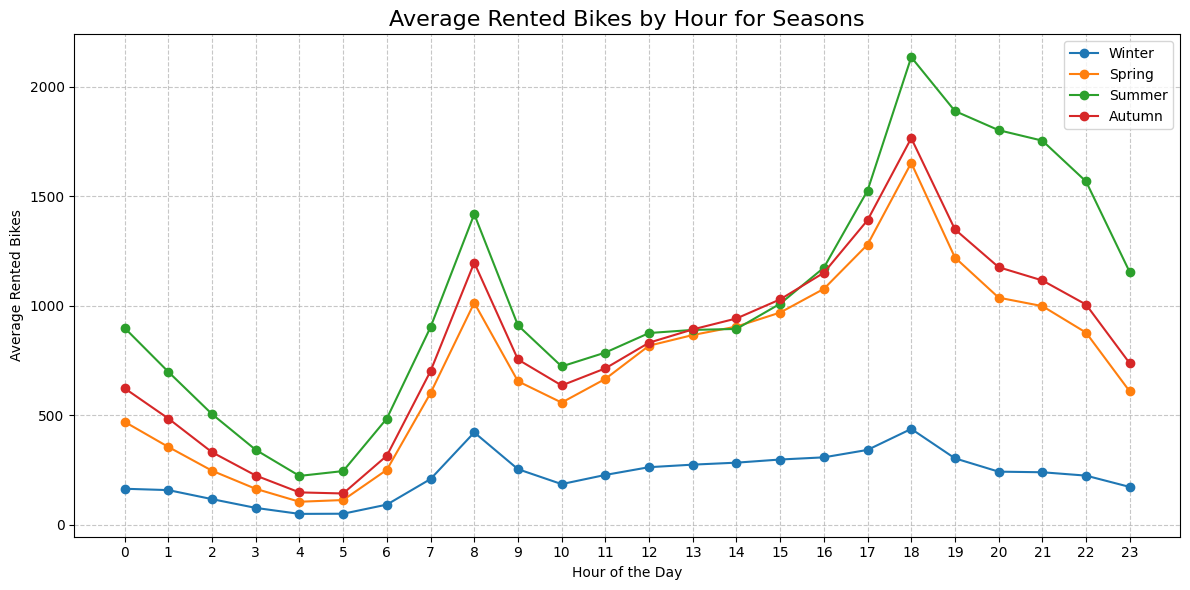

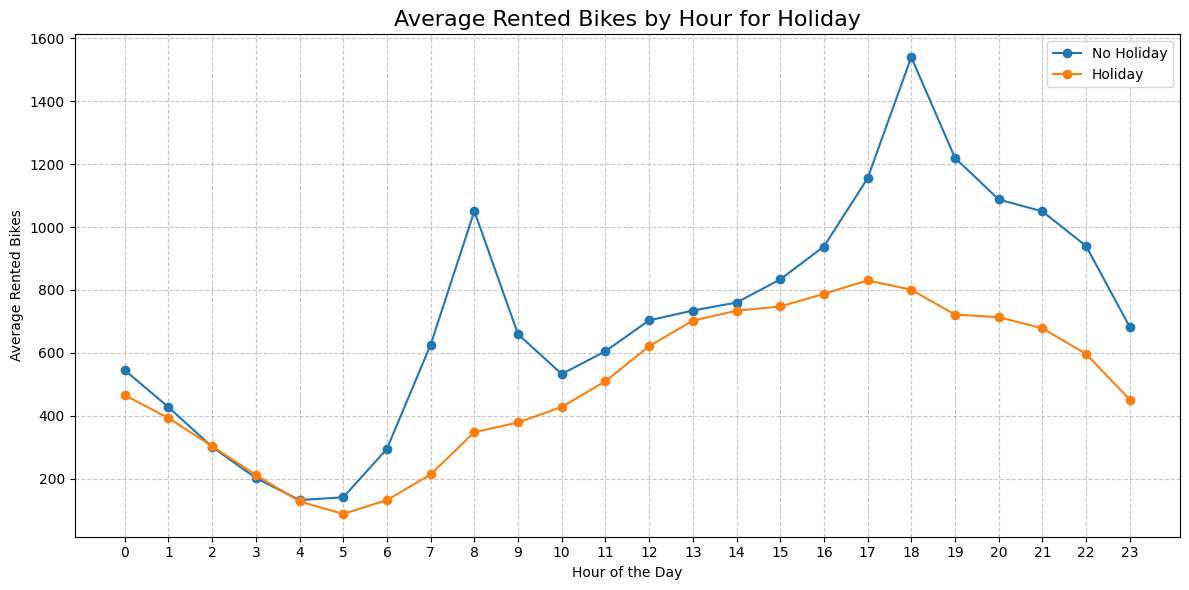

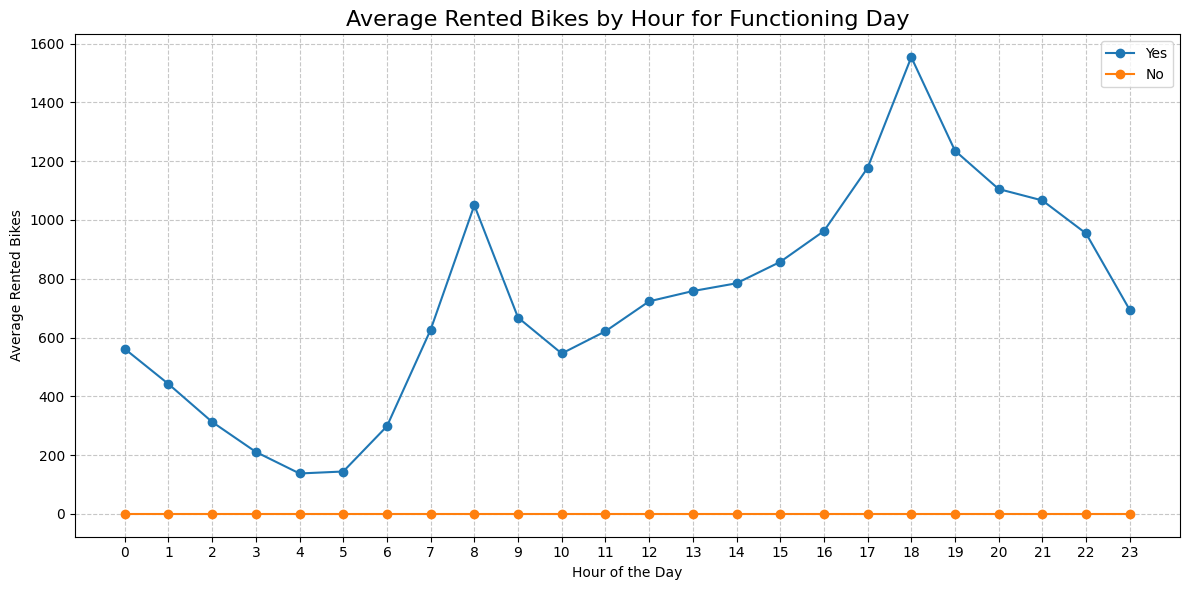

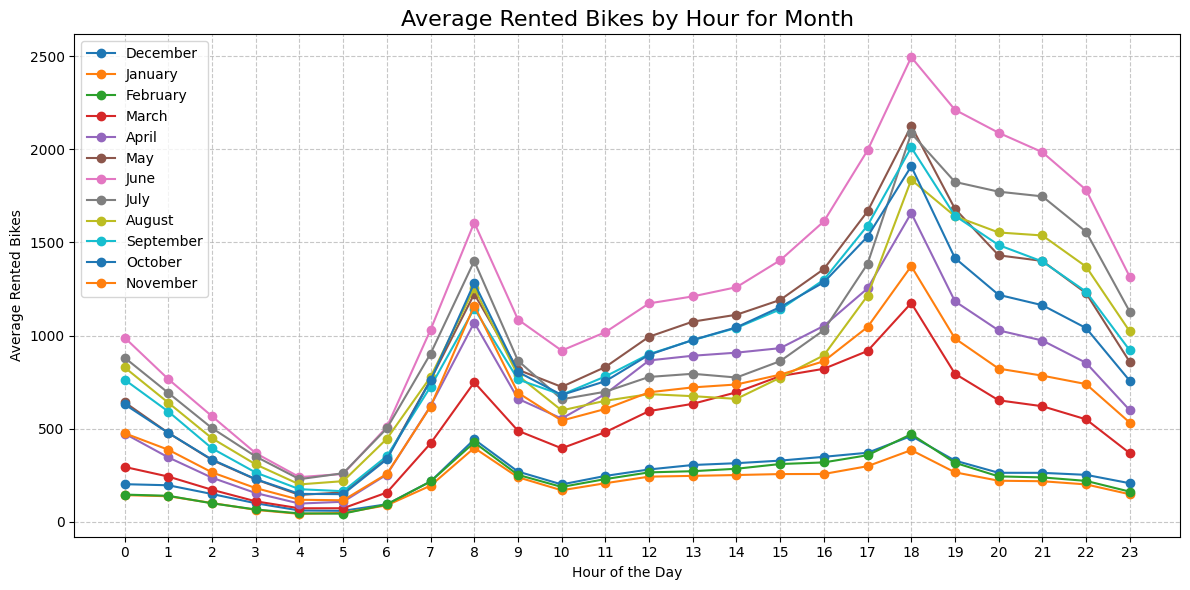

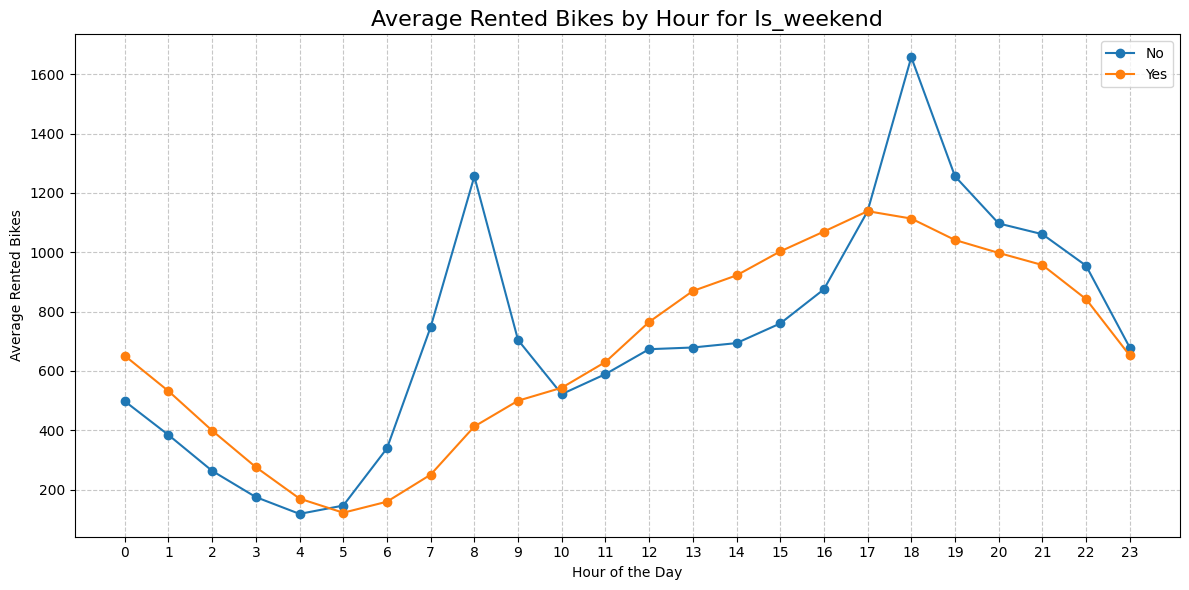

In [ ]:
import matplotlib.pyplot as plt

def plot_rented_bikes_vs_hours(df, feature):
    # Create a single plot
    plt.figure(figsize=(12, 6))

    # Get unique categories
    categories = df[feature].unique()

    for category in categories:
        # Filter the data for the current category
        category_data = df[df[feature] == category]

        # Group by hour and calculate mean of rented bikes
        hourly_mean = category_data.groupby('Hour')['Rented Bike Count'].mean().reset_index()

        # Convert to numpy arrays before plotting
        hours = hourly_mean['Hour'].to_numpy()
        bike_counts = hourly_mean['Rented Bike Count'].to_numpy()

        # Plot for this category
        plt.plot(hours, bike_counts, marker='o', label=str(category))

    plt.xlabel('Hour of the Day')
    plt.ylabel('Average Rented Bikes')
    plt.title(f'Average Rented Bikes by Hour for {feature}', fontsize=16)
    plt.xticks(range(0, 24))
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Generate plots for each categorical feature
for feature in categorical_features:
    plot_rented_bikes_vs_hours(df, feature)

## 2 Visualize the rented bike count outliers for each categorical features

In [ ]:
import seaborn as sns

def plot_rented_bikes_boxplot(df, feature):
    plt.figure(figsize=(14, 8))

    # Create the boxplot
    sns.boxplot(x='Hour', y='Rented Bike Count', hue=feature, data=df)

    plt.xlabel('Hour of the Day', fontsize=12)
    plt.ylabel('Rented Bike Count', fontsize=12)
    plt.title(f'Distribution of Rented Bikes by Hour for {feature}', fontsize=16)
    plt.xticks(range(0, 24))
    plt.legend(title=feature, bbox_to_anchor=(1.05, 1), loc='upper left')

    # Adjust layout to prevent cutting off the legend
    plt.tight_layout()
    plt.show()

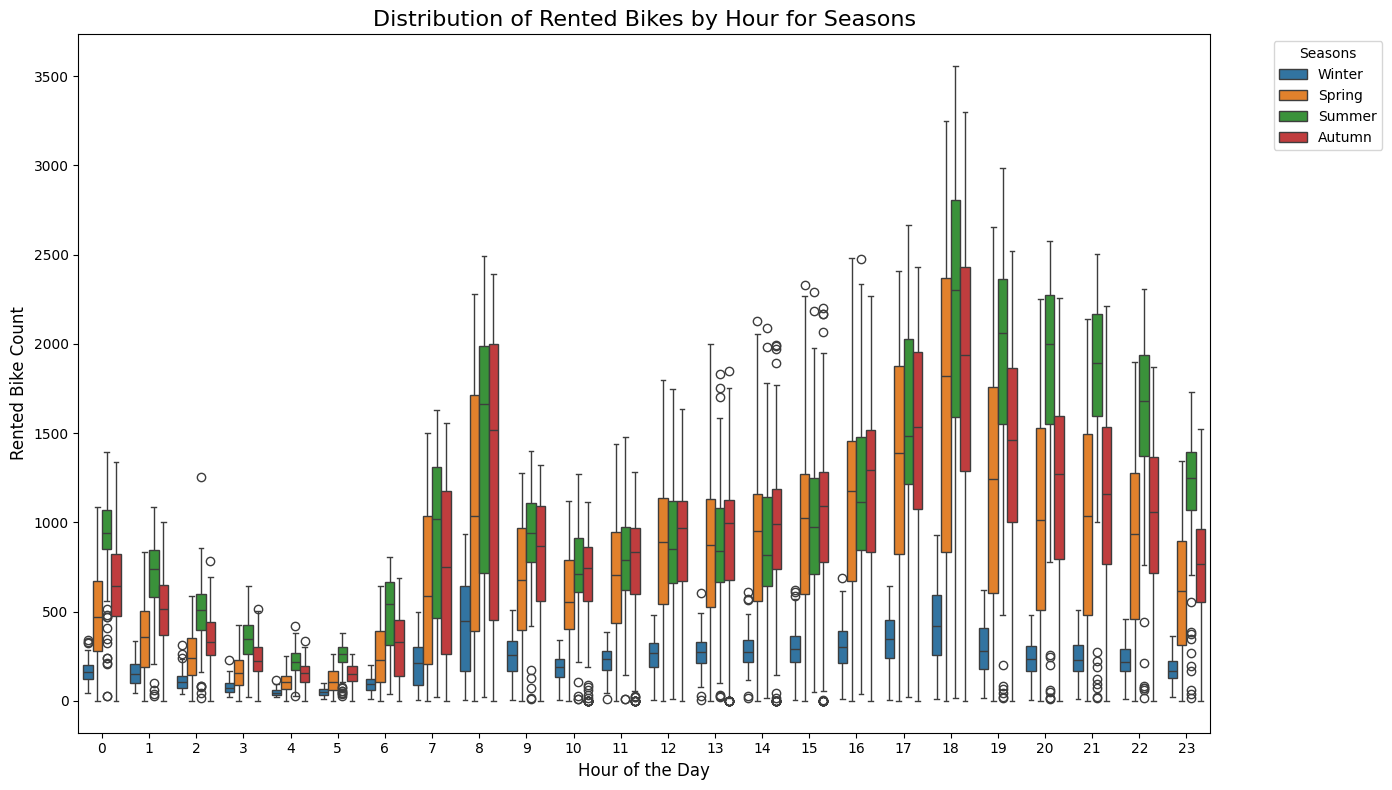

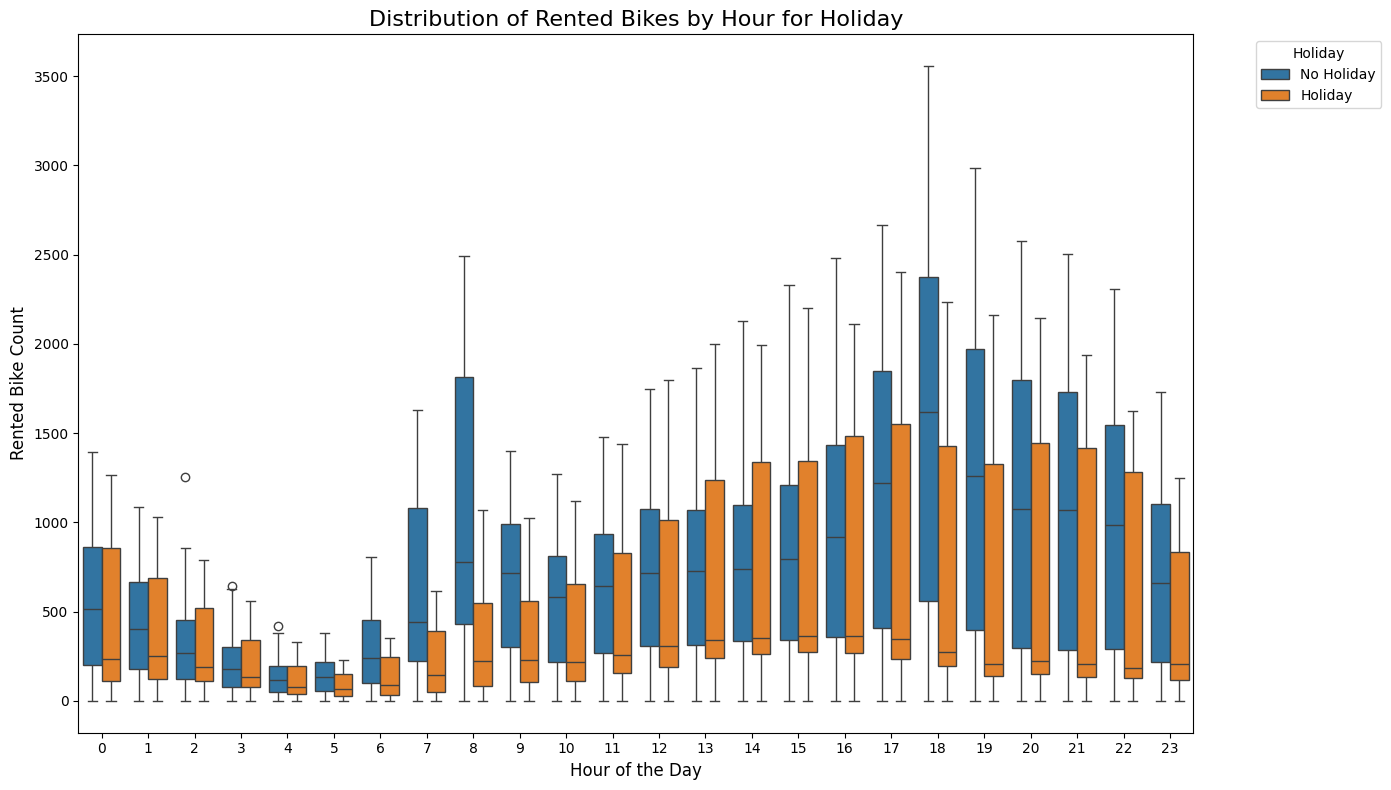

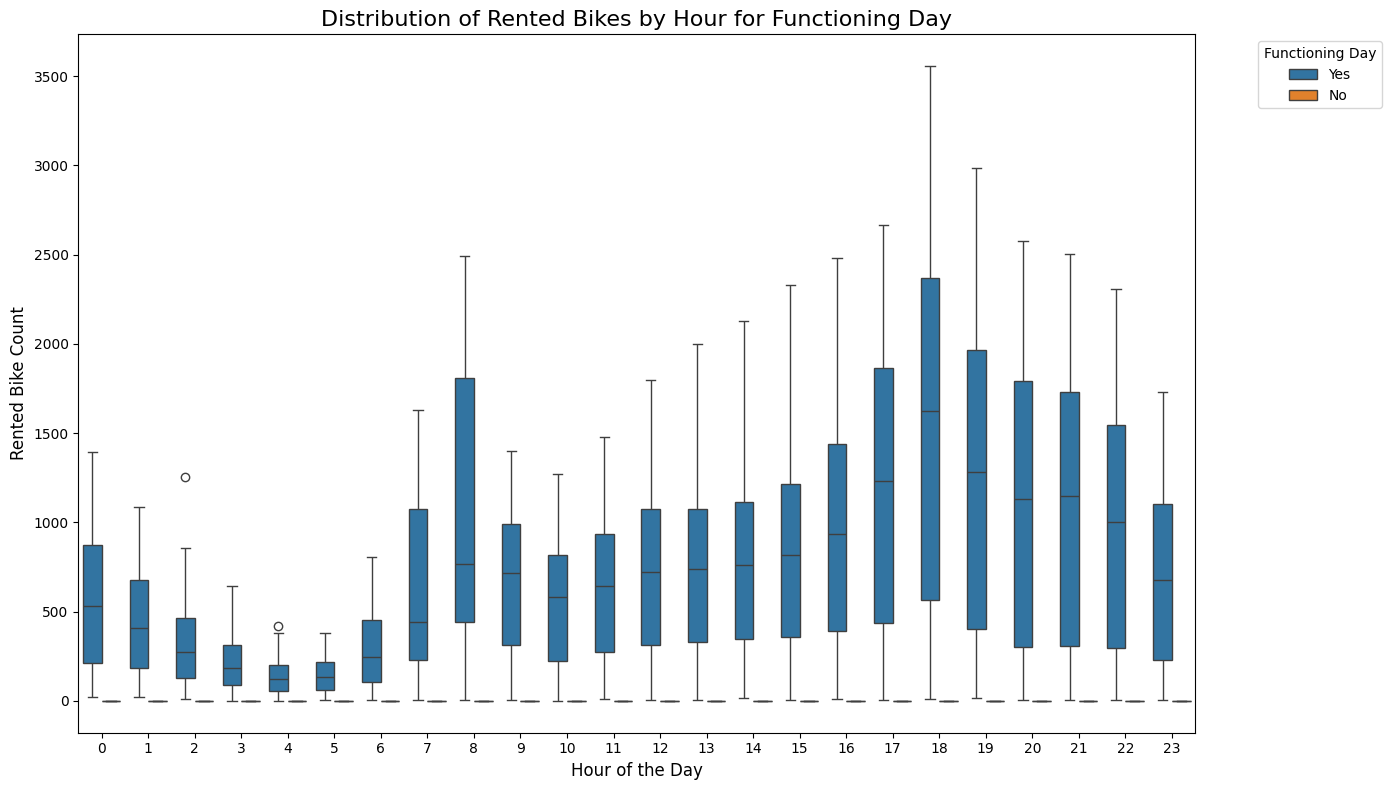

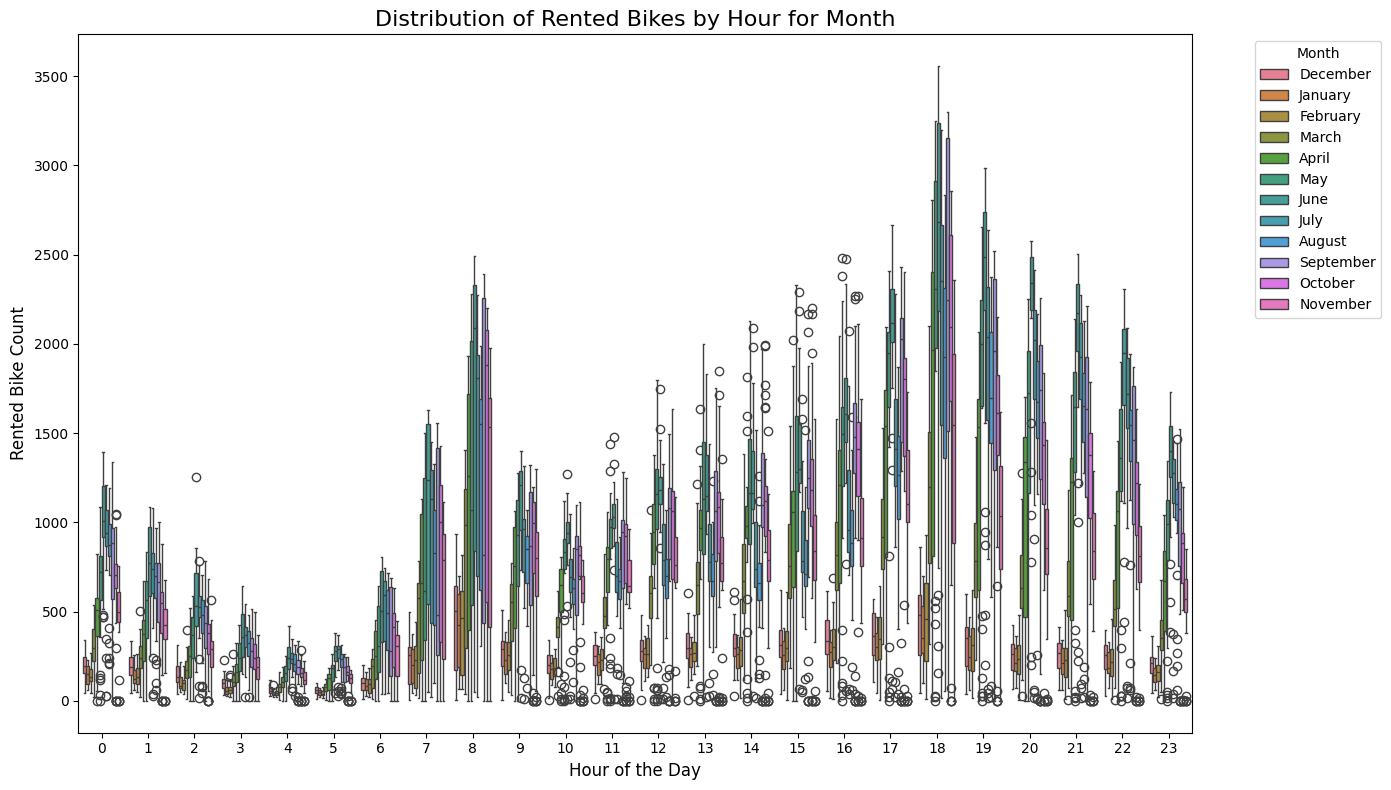

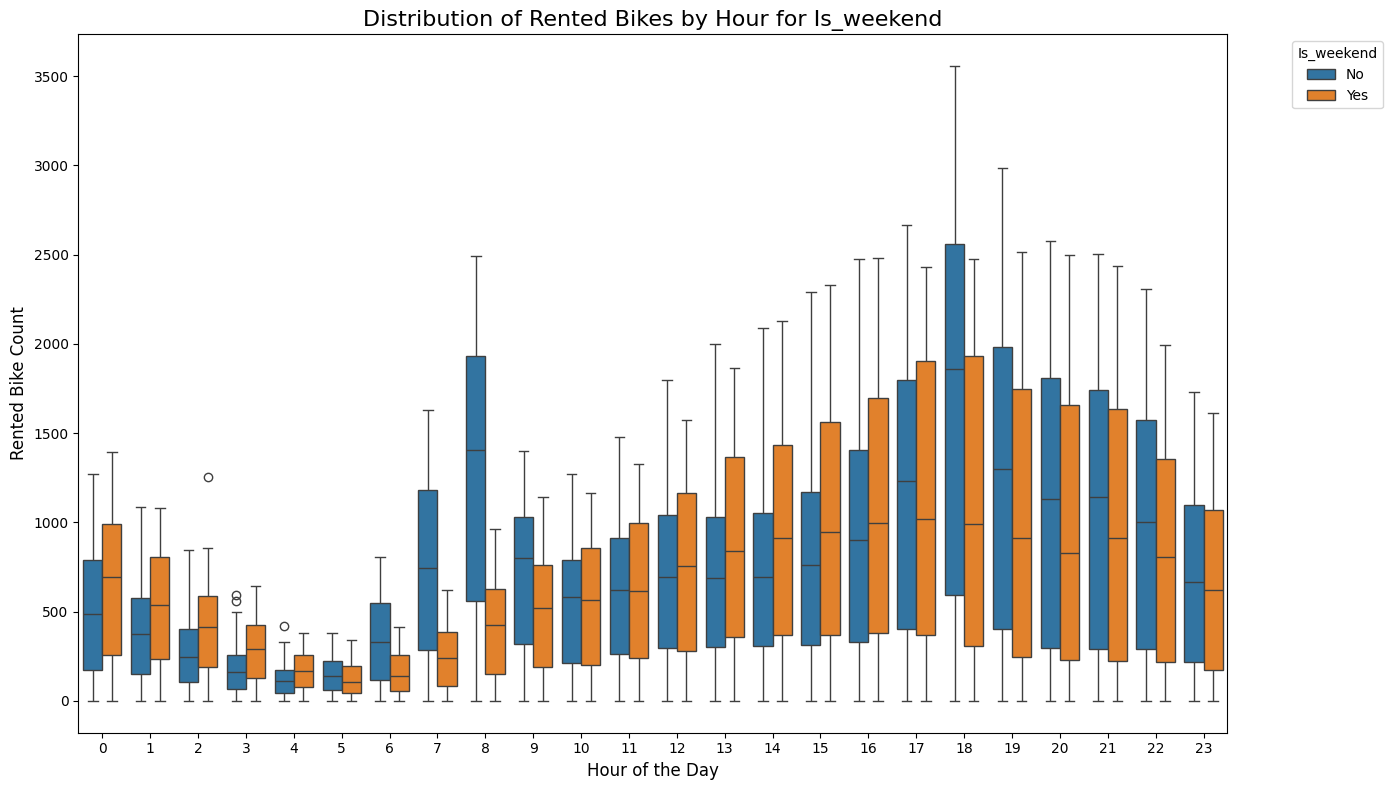

In [ ]:
# Generate boxplots for each categorical feature
for feature in categorical_features:
    plot_rented_bikes_boxplot(df, feature)

## 3 Visualize the variation in the data distribution for each numerical features. Also, mark/show the mean and median of the distibution in the plot

In [ ]:
numerical_features = ['Hour', 'Temperature(C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']

In [ ]:
def plot_feature_density(df, feature_name):

    # Create the plot
    plt.figure(figsize=(12, 6))

    # Plot the density
    sns.kdeplot(data=df[feature_name], fill=True)

    # Calculate and plot the mean
    mean = df[feature_name].mean()
    plt.axvline(mean, color='red', linestyle='--', label=f'Mean: {mean:.2f}')

    # Calculate and plot the median
    median = df[feature_name].median()
    plt.axvline(median, color='green', linestyle='-.', label=f'Median: {median:.2f}')

    # Set labels and title
    plt.xlabel(feature_name)
    plt.ylabel('Density')
    plt.title(f'Density Plot of {feature_name}')

    # Add legend
    plt.legend()

    # Show the plot
    plt.show()

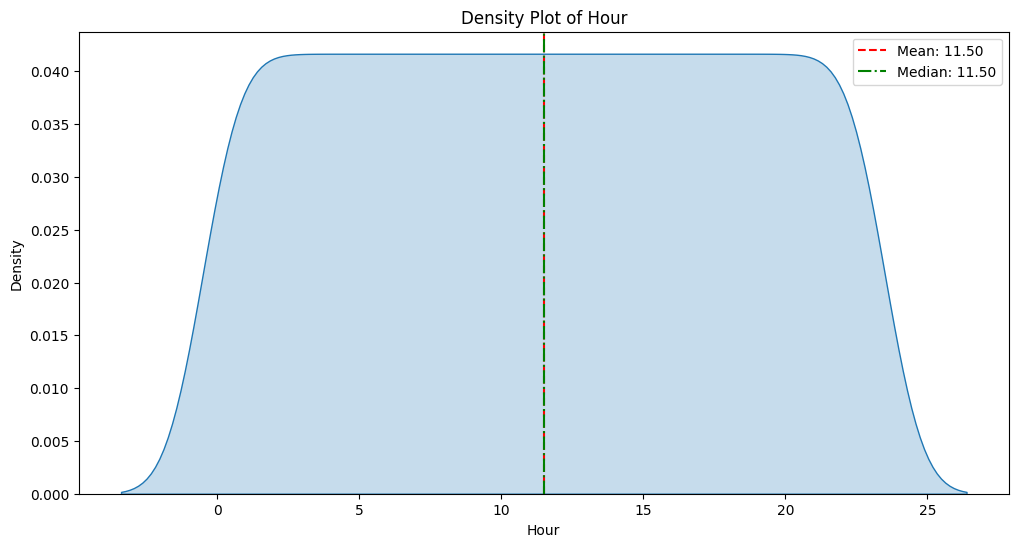

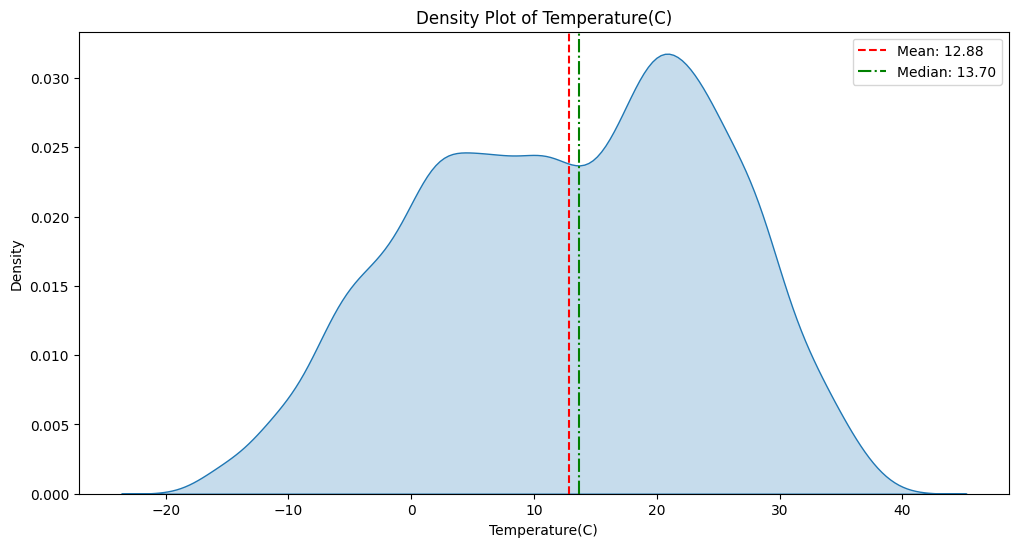

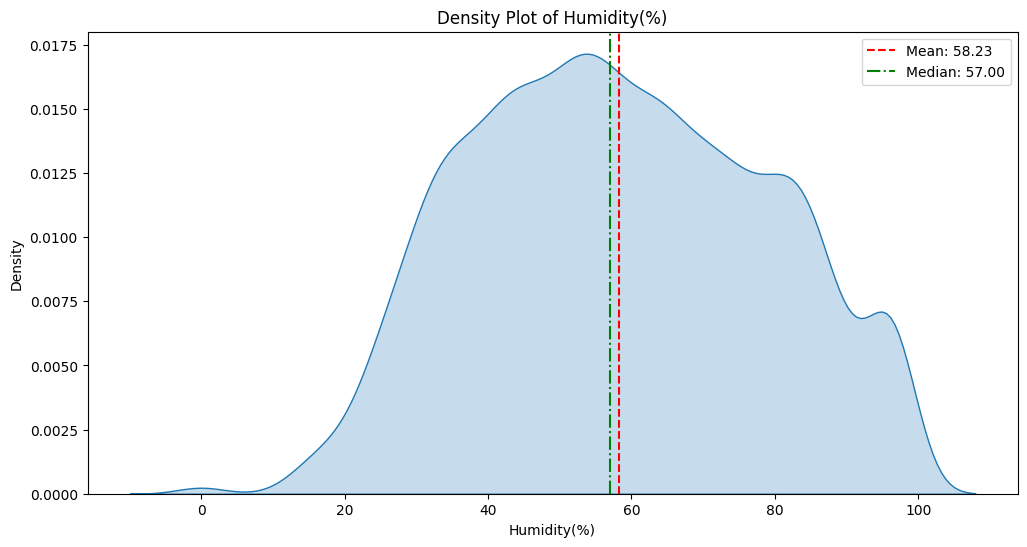

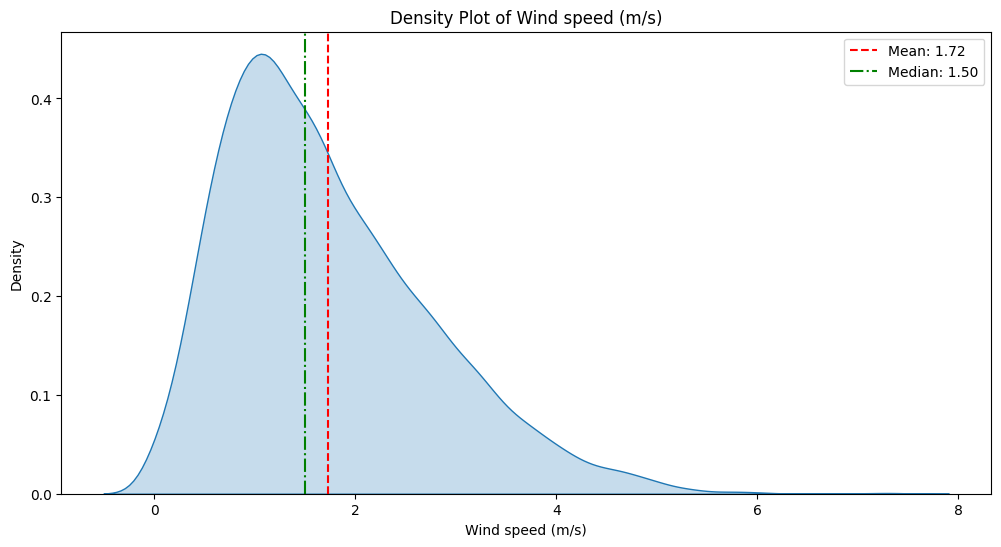

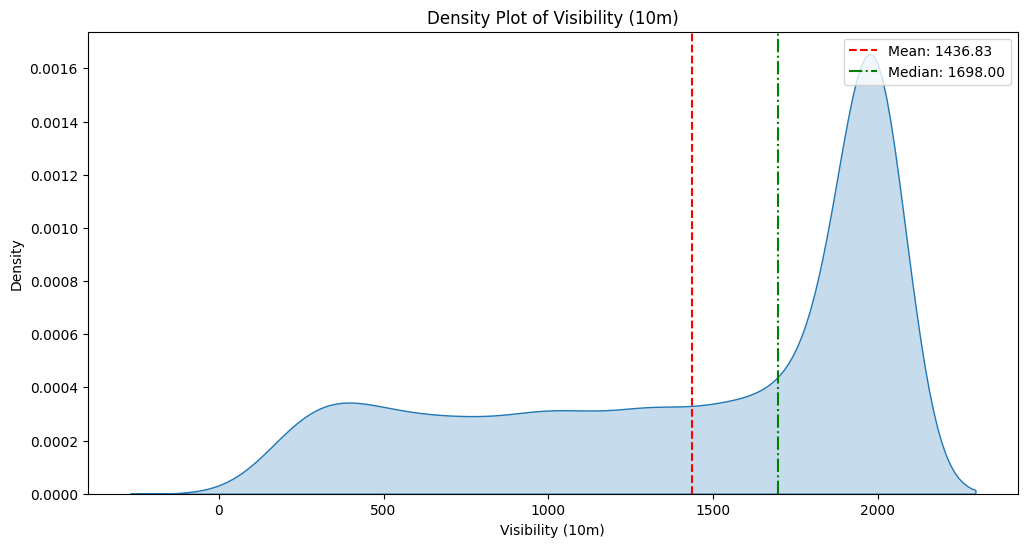

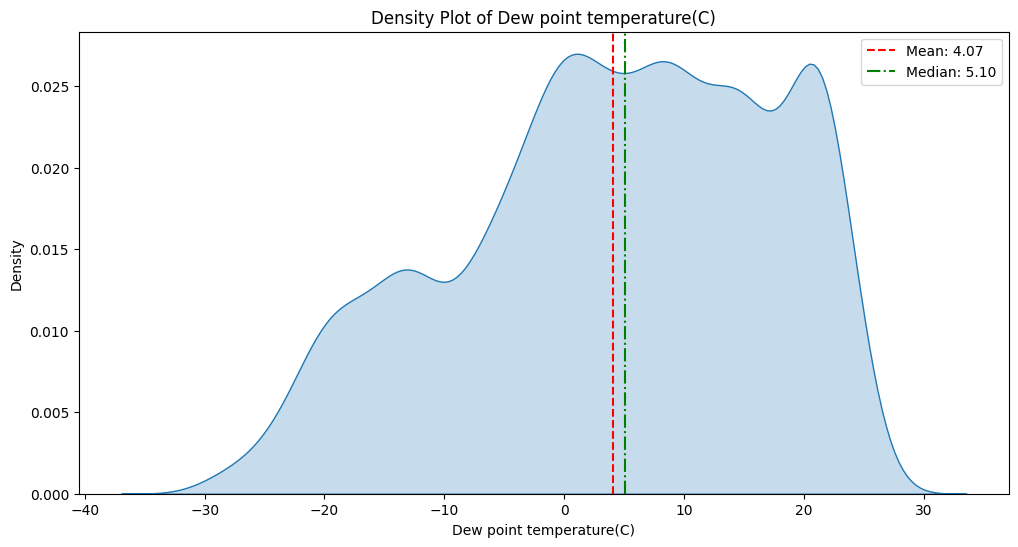

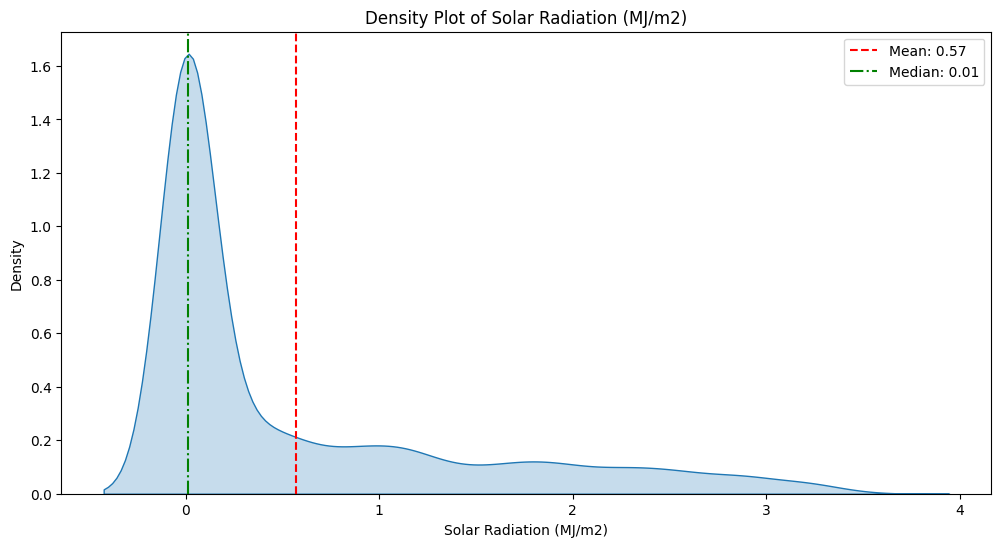

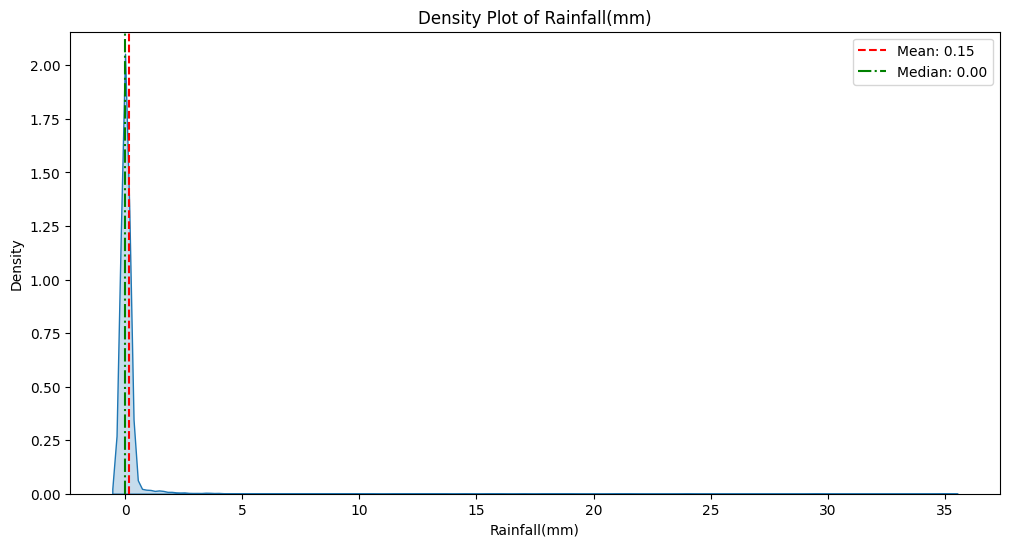

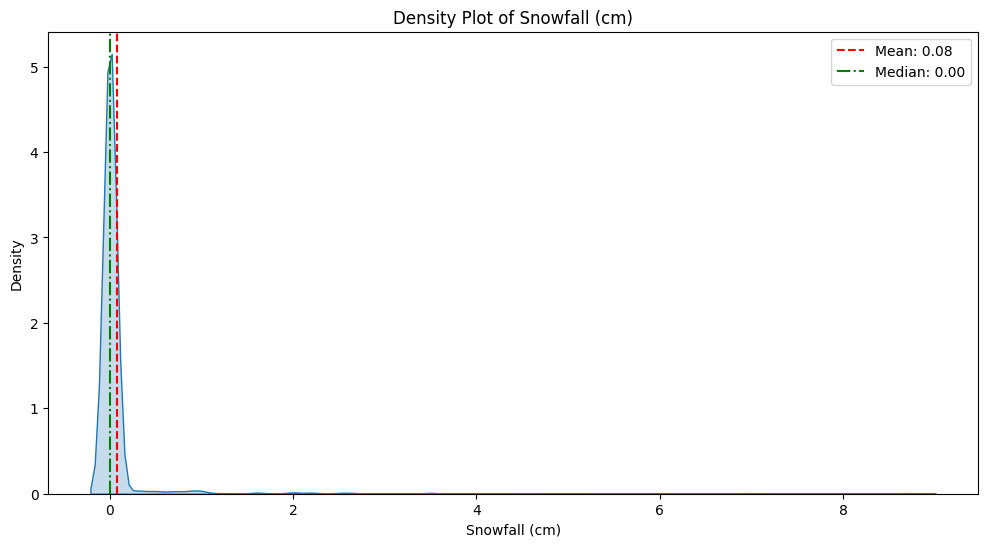

In [ ]:
for feature in numerical_features:
    plot_feature_density(df, feature)

## 4 Visualize the outliers in each numerical feature data

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

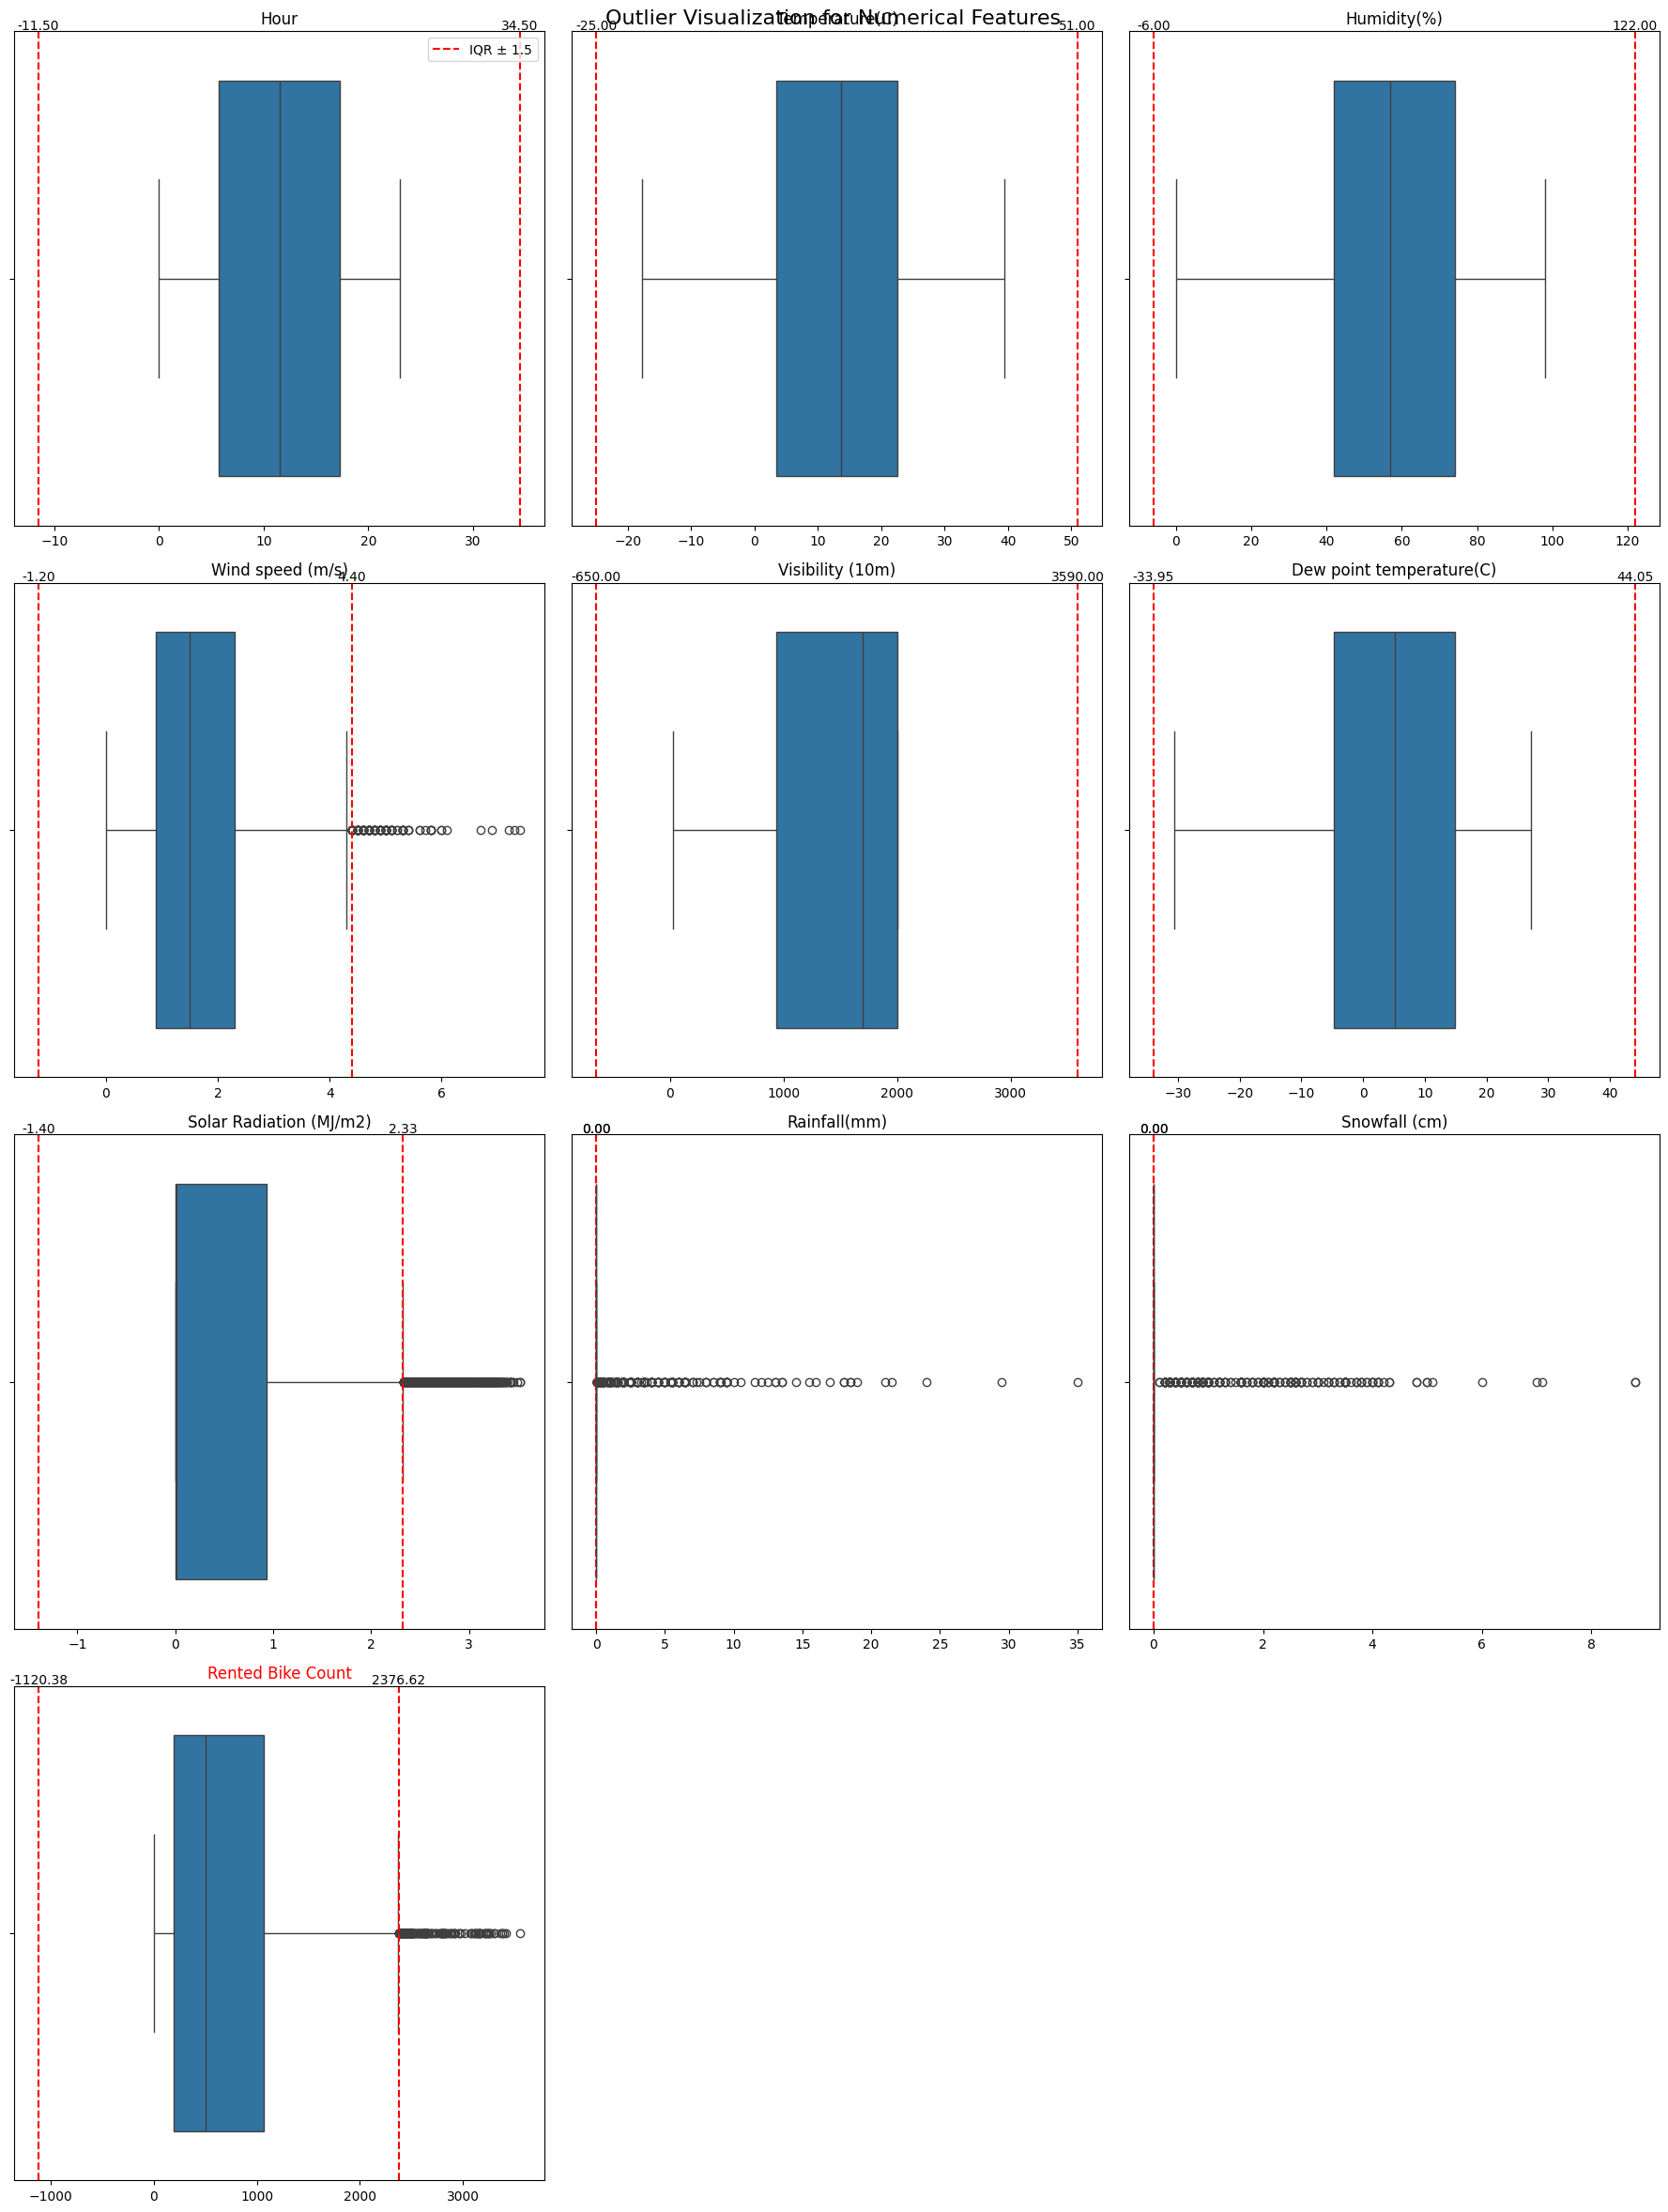

In [ ]:
def visualize_outliers(df, numerical_features, target_variable='Rented Bike Count'):
    features_to_plot = numerical_features + [target_variable]
    n_features = len(features_to_plot)
    n_cols = 3
    n_rows = (n_features + n_cols - 1) // n_cols

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(6*n_cols, 6*n_rows))
    fig.suptitle('Outlier Visualization for Numerical Features', fontsize=16)

    axes = axes.flatten()

    for i, feature in enumerate(features_to_plot):
        # Create box plot
        sns.boxplot(x=df[feature], ax=axes[i])

        # Calculate IQR and bounds
        Q1 = df[feature].quantile(0.25)
        Q3 = df[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Add vertical lines for IQR ± 1.5
        axes[i].axvline(x=lower_bound, color='r', linestyle='--', label='IQR ± 1.5')
        axes[i].axvline(x=upper_bound, color='r', linestyle='--')

        # Formatting
        axes[i].set_title(feature)
        axes[i].set_xlabel('')
        if feature == target_variable:
            axes[i].title.set_color('red')

        # Add text annotations for bounds
        ymin, ymax = axes[i].get_ylim()
        axes[i].text(lower_bound, ymax*1.01, f'{lower_bound:.2f}', horizontalalignment='center')
        axes[i].text(upper_bound, ymax*1.01, f'{upper_bound:.2f}', horizontalalignment='center')

        # Only show legend for the first plot
        if i == 0:
            axes[i].legend(loc='upper right')

    for i in range(n_features, len(axes)):
        fig.delaxes(axes[i])

    plt.tight_layout()
    plt.show()

visualize_outliers(df, numerical_features)

## 5 Create a regression plot to know relation between dependent and independent numerical variables

In [ ]:
import math

In [ ]:
def plot_multiple_regressions(df, y, x_variables):
    all_variables = [y] + x_variables

    # Calculate the number of rows and columns for the subplot grid
    n_plots = len(x_variables)
    n_cols = min(3, n_plots)  # Max 3 columns
    n_rows = math.ceil(n_plots / n_cols)

    # Create the plot
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(10*n_cols, 8*n_rows))
    fig.suptitle(f'Regression Plots: {y} vs Independent Variables', fontsize=16)

    # Flatten the axes array for easier indexing
    axes = axes.flatten() if n_plots > 1 else [axes]

    # Plot each regression
    for i, x_var in enumerate(x_variables):
        sns.regplot(x=x_var, y=y, data=df, ax=axes[i],
                    scatter_kws={'color': 'lightgreen', 'alpha': 0.5},  # Faint green scatter points
                    line_kws={'color': 'darkred'})  # Blood red regression line
        axes[i].set_title(f'{y} vs {x_var}')
        axes[i].set_xlabel(x_var)
        axes[i].set_ylabel(y)

    # Remove any unused subplots
    for i in range(n_plots, len(axes)):
        fig.delaxes(axes[i])

    # Adjust layout and show the plot
    plt.tight_layout()
    plt.show()

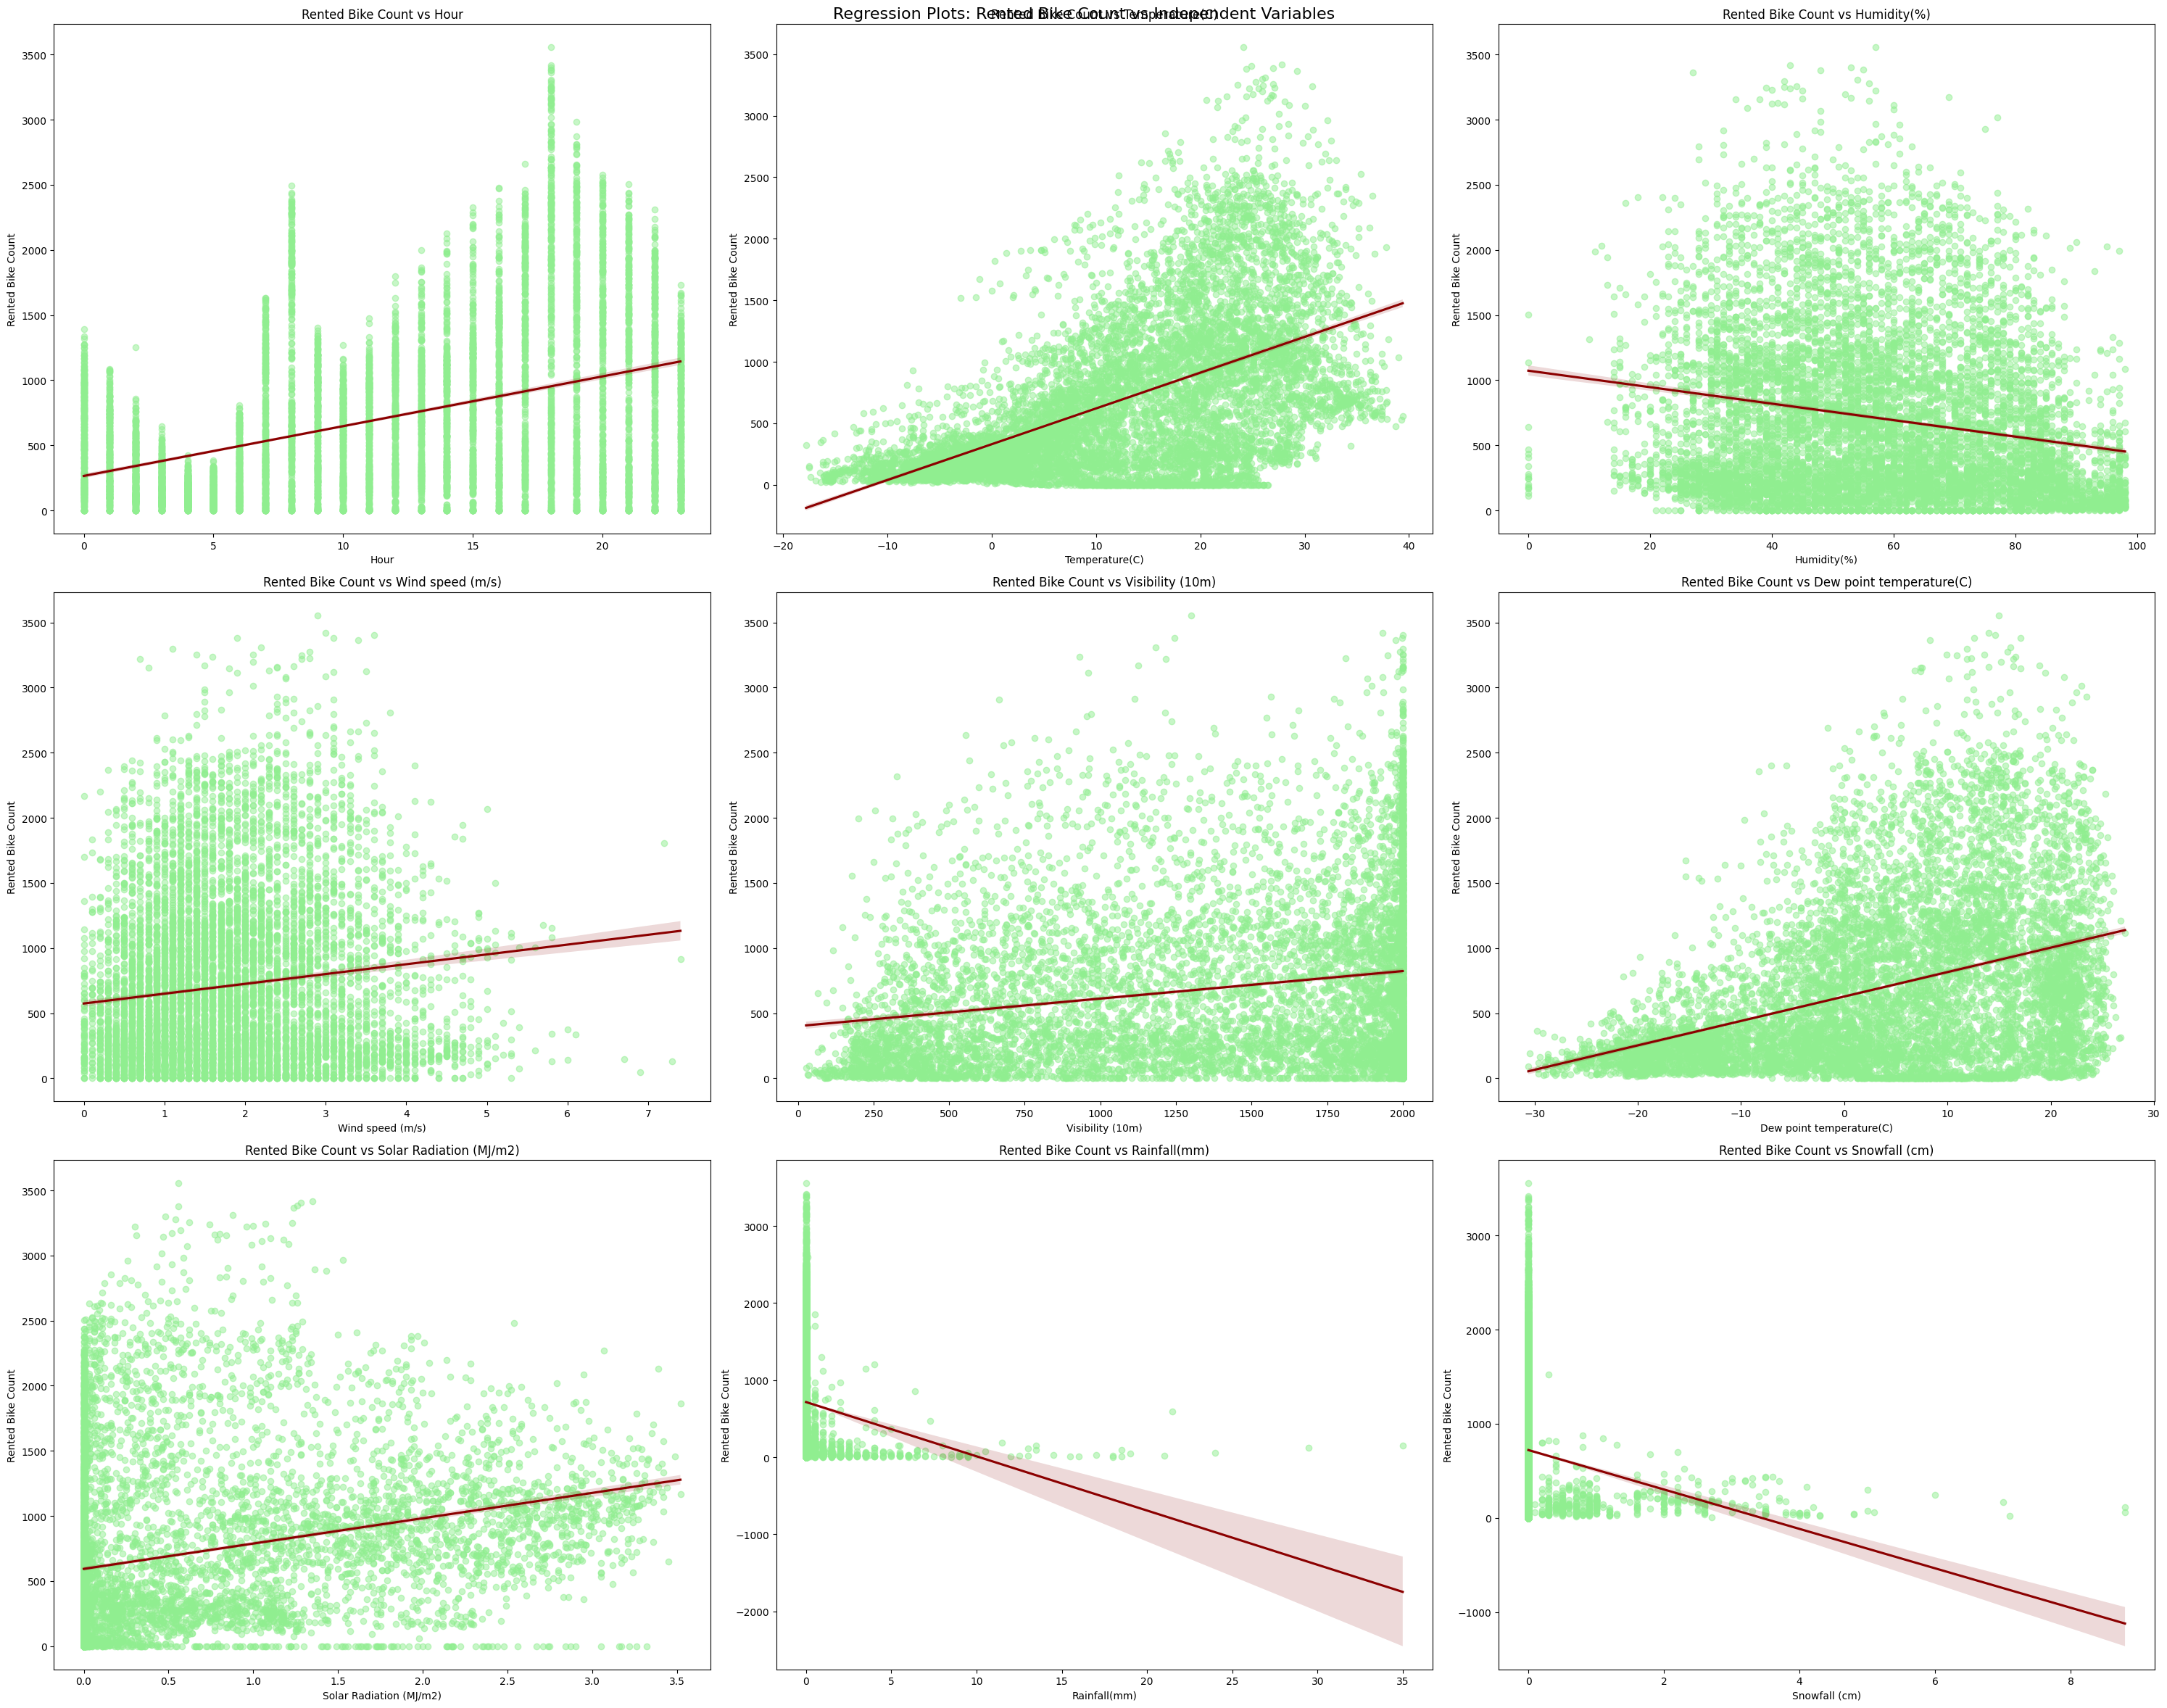

In [ ]:
plot_multiple_regressions(df, 'Rented Bike Count', numerical_features)

## 6 Visualize the correlation between different numerical features using heat map. Find and remove correlated features for a threshold value of 0.7 (correlation>0.7)

In [ ]:
def create_correlation_heatmap(df, features, threshold):
    # Calculate the correlation matrix
    corr_matrix = df[features].corr()

    # Create a mask to hide the upper triangle
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

    # Create a custom color map
    cmap = 'RdYlGn_r'

    # Create a custom normalization
    norm = plt.Normalize(vmin=-1, vmax=1)

    # Set up the matplotlib figure
    plt.figure(figsize=(12, 10))

    # Create the heatmap
    sns.heatmap(corr_matrix, mask=mask, annot=True, cmap=cmap, norm=norm,
                cbar=False, square=True, linewidths=0.5)

    # Add colored squares based on threshold
    for i in range(len(corr_matrix.columns)):
        for j in range(len(corr_matrix.columns)):
            if i > j:  # Lower triangle only
                plt.gca().add_patch(plt.Rectangle((j, i), 1, 1,
                                    fill=True,
                                    color='red' if abs(corr_matrix.iloc[i, j]) >= threshold else 'green',
                                    alpha=0.5))

    plt.title(f'Correlation Heatmap (Threshold: {threshold})')
    plt.tight_layout()
    plt.show()

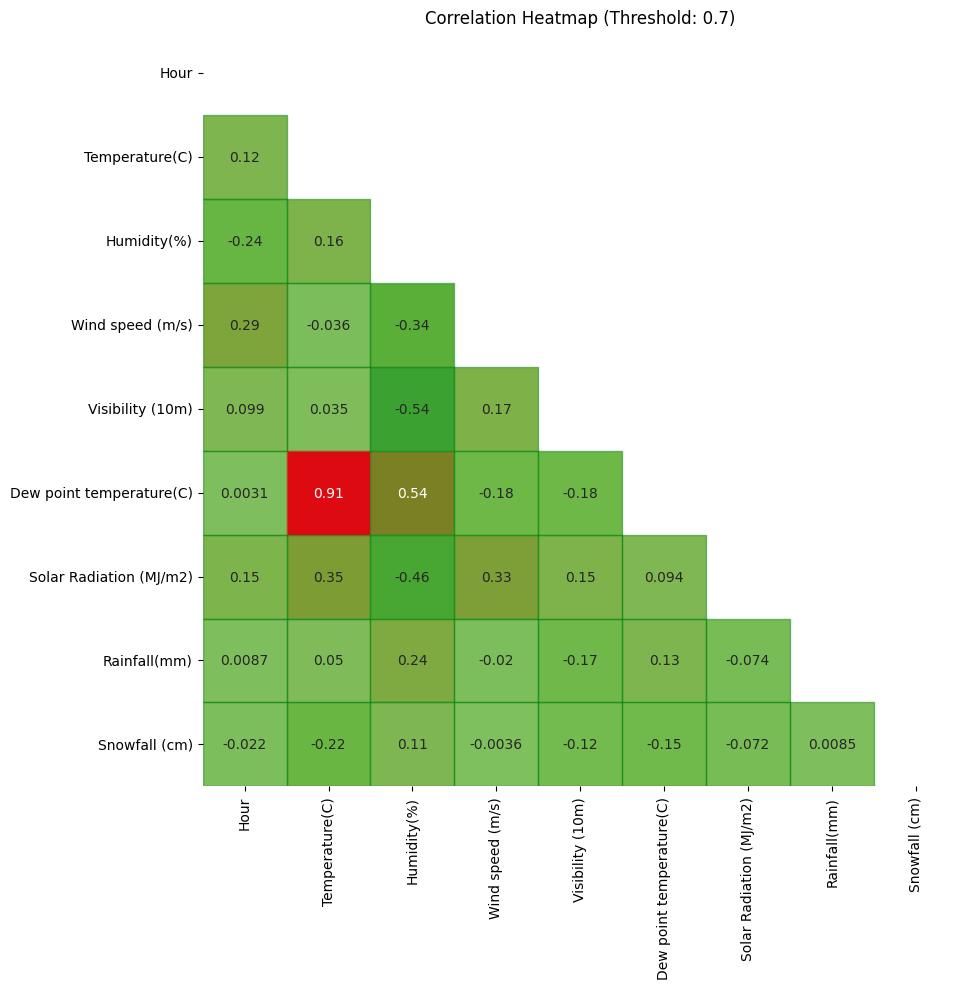

In [ ]:
create_correlation_heatmap(df, numerical_features, 0.7)

We identify that Dew point temperature and temperature have more correlation that $0.7$. To decide which one to drop, we will calculate correlation for both of them with the 'Rented bike count' and drop the one with a lower value of the correlation.

In [ ]:
# Calculate corelation between 'Rented Bike Count' and 'Dew point temperature(C)'
correlation_1 = df['Rented Bike Count'].corr(df['Dew point temperature(C)'])

# Calculate corelation between 'Rented Bike Count' and 'Temperature(C)'
correlation_2 = df['Rented Bike Count'].corr(df['Temperature(C)'])

if correlation_1 > correlation_2:
    # Delete the 'Temperature(C)' column
    del df['Temperature(C)']
    print("The 'Temperature(C)' column has been deleted.")
else:
    # Delete the 'Dew point temperature(C)' column
    del df['Dew point temperature(C)']
    print("The 'Dew point temperature(C)' column has been deleted.")

The 'Dew point temperature(C)' column has been deleted.


In [ ]:
df.head(3)

Date  Rented Bike Count  Hour  Temperature(C)  Humidity(%)  \
0 2017-12-01                254     0            -5.2           37   
1 2017-12-01                204     1            -5.5           38   
2 2017-12-01                173     2            -6.0           39   

   Wind speed (m/s)  Visibility (10m)  Solar Radiation (MJ/m2)  Rainfall(mm)  \
0               2.2              2000                      0.0           0.0   
1               0.8              2000                      0.0           0.0   
2               1.0              2000                      0.0           0.0   

   Snowfall (cm) Seasons     Holiday Functioning Day     Month Is_weekend  
0            0.0  Winter  No Holiday             Yes  December         No  
1            0.0  Winter  No Holiday             Yes  December         No  
2            0.0  Winter  No Holiday             Yes  December         No

### Analysis of Plots

## 7 Encoding categorical features

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.base import BaseEstimator, TransformerMixin

In [ ]:
# Define the columns to be encoded
columns_to_encode = ['Is_weekend', 'Functioning Day', 'Holiday']

# Define the preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('binary_encoder', FunctionTransformer(lambda x: (x == 'Yes').astype(int)), columns_to_encode)
    ])

# Create the pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor)
])

# Fit and transform the data
encoded_features = pipeline.fit_transform(df[columns_to_encode])

# Get feature names
feature_names = [f'{col}' for col in columns_to_encode]

# Create a new DataFrame with encoded features
encoded_df = pd.DataFrame(encoded_features, columns=feature_names, index=df.index)

# Concatenate the encoded features with the original DataFrame and drop the original columns
result_df = pd.concat([df.drop(columns=columns_to_encode), encoded_df], axis=1)

# Assign the result back to df
df = result_df

In [ ]:
# Define the month order
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

# Define the preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('month_encoder', OrdinalEncoder(categories=[month_order]), ['Month'])
    ])

# Create the pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor)
])

# Fit and transform the data
encoded_features = pipeline.fit_transform(df[['Month']])

# Shift the encoded values from 0-11 to 1-12
encoded_features += 1

# Get feature names
feature_names = ['Month']

# Delete the original 'Month' column

del df['Month']

# Create a new DataFrame with encoded features
encoded_df = pd.DataFrame(encoded_features, columns=feature_names, index=df.index)

# Concatenate the encoded features with the original DataFrame
result_df = pd.concat([df, encoded_df], axis=1)

# Assign the result back to df
df = result_df

In [ ]:
# Define a mapping for the seasons to their corresponding one-hot encoding vectors
season_encoding = {
    'Winter': [1, 0, 0, 0],
    'Spring': [0, 1, 0, 0],
    'Summer': [0, 0, 1, 0],
    'Autumn': [0, 0, 0, 1]
}

# Custom transformer function to apply the encoding
def encode_seasons(X):
    return X['Seasons'].map(season_encoding).tolist()

# Create a FunctionTransformer using the custom function
season_transformer = FunctionTransformer(encode_seasons, validate=False)

# Create a pipeline that applies the custom transformer to the Seasons column
pipeline = Pipeline(steps=[
    ('season_encoding', season_transformer)
])

# Apply the pipeline to transform the Seasons column
df['Seasons'] = pipeline.fit_transform(df)

## 8 Delete non-relevant feautes from the dataframe and comment

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [ ]:
# Remove 'Dew point temperature(C)' from the numerical features

numerical_features.remove('Dew point temperature(C)')

In [ ]:
# Select only the numerical features and the target
X = df[numerical_features]
y = df['Rented Bike Count']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Random Forest Regressor
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)

# Get feature importances
importances = rf_reg.feature_importances_
feature_names = X.columns

# Sort features by importance
feature_importance = pd.DataFrame({'feature': feature_names, 'importance': importances})
feature_importance = feature_importance.sort_values('importance', ascending=False).reset_index(drop=True)

# Print feature importances
print("Numerical Feature Importances:")
print(feature_importance)

Numerical Feature Importances:
                   feature  importance
0           Temperature(C)    0.375143
1                     Hour    0.286733
2  Solar Radiation (MJ/m2)    0.117062
3              Humidity(%)    0.097626
4         Visibility (10m)    0.041439
5         Wind speed (m/s)    0.040789
6             Rainfall(mm)    0.040747
7            Snowfall (cm)    0.000461


In [ ]:
# Create 4 more columns for the one-hot encoded 'Seasons' column
# and fill it using the mapping
# 'Winter': [1, 0, 0, 0]
# 'Spring': [0, 1, 0, 0],
# 'Summer': [0, 0, 1, 0],
# 'Autumn': [0, 0, 0, 1]

df['Seasons_Winter'] = df['Seasons'].apply(lambda x: x[0])
df['Seasons_Spring'] = df['Seasons'].apply(lambda x: x[1])
df['Seasons_Summer'] = df['Seasons'].apply(lambda x: x[2])
df['Seasons_Autumn'] = df['Seasons'].apply(lambda x: x[3])

In [ ]:
# Define categorical features, including one-hot encoded 'Seasons'
categorical_features = ['Holiday', 'Functioning Day', 'Is_weekend', 'Month', 'Seasons_Spring', 'Seasons_Summer', 'Seasons_Autumn', 'Seasons_Winter']

# Prepare X and y
X = df[categorical_features]
y = df['Rented Bike Count']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Random Forest Regressor
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)

# Get feature importances
importances = rf_reg.feature_importances_
feature_names = X.columns

# Create a DataFrame for feature importances
feature_importance = pd.DataFrame({'feature': feature_names, 'importance': importances})
feature_importance = feature_importance.sort_values('importance', ascending=False).reset_index(drop=True)

# Print feature importances
print("Feature Importances:")
print(feature_importance)

overall_Seasons_importance = feature_importance[feature_importance['feature'].str.contains('Seasons')]['importance'].sum()

# Print the overall importance of the 'Seasons' feature
print(f"\nOverall Importance of 'Seasons' Feature: {overall_Seasons_importance:.4f}")

Feature Importances:
           feature  importance
0   Seasons_Winter    0.552109
1            Month    0.216906
2  Functioning Day    0.192137
3       Is_weekend    0.018584
4   Seasons_Spring    0.008694
5   Seasons_Summer    0.008659
6   Seasons_Autumn    0.002912
7          Holiday    0.000000

Overall Importance of 'Seasons' Feature: 0.5724


In [ ]:
# Remove the features with feature importance less than 0.01

del df['Snowfall (cm)']
del df['Holiday']

In [ ]:
# Remove Date
del df['Date']

## 9 Visualize the dependent variable data-distribution and check for skewness. The regression assumes that the dependent variable has a nearly normal distribution, therefore, to meet this assumption, make some measures to normalize the distribution, if necessary

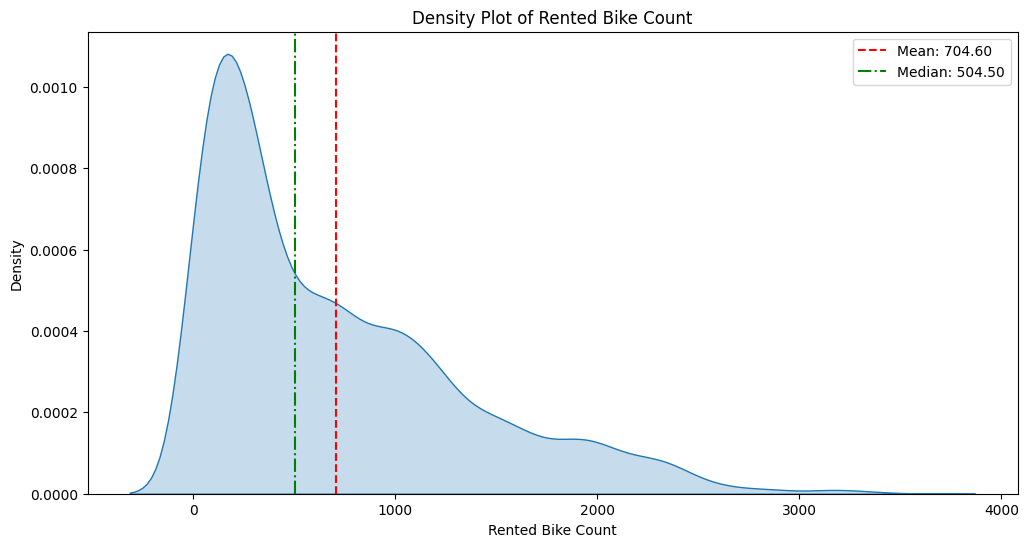

In [ ]:
# Plot the density of 'Rented Bike Count'

plot_feature_density(df, 'Rented Bike Count')

In [ ]:
# Calculate skewness
skewness = df['Rented Bike Count'].skew()
print(f"Skewness of Rented Bike Count: {skewness:.2f}")

# Interpret skewness
if abs(skewness) < 0.5:
    print("The distribution is approximately symmetric.")
elif abs(skewness) < 1:
    print("The distribution is moderately skewed.")
else:
    print("The distribution is highly skewed.")

if skewness > 0:
    print("The distribution has a positive skew (right-tailed).")
else:
    print("The distribution has a negative skew (left-tailed).")

Skewness of Rented Bike Count: 1.15
The distribution is highly skewed.
The distribution has a positive skew (right-tailed).


We will use square root to compresses the right tail of the distribution.

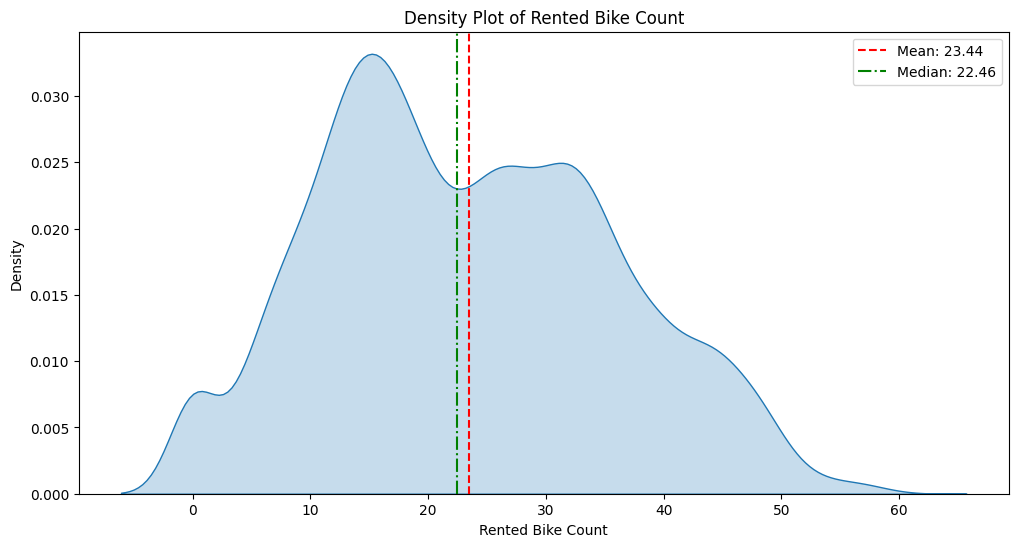

In [ ]:
# Transform the target variable using the square root transformation

df['Rented Bike Count'] = np.sqrt(df['Rented Bike Count'])

# Plot the density of 'Rented Bike Count' after transformation

plot_feature_density(df, 'Rented Bike Count')

In [ ]:
# Calculate skewness
skewness = df['Rented Bike Count'].skew()
print(f"Skewness of Rented Bike Count: {skewness:.2f}")

# Interpret skewness
if abs(skewness) < 0.5:
    print("The distribution is approximately symmetric.")
elif abs(skewness) < 1:
    print("The distribution is moderately skewed.")
else:
    print("The distribution is highly skewed.")

if skewness > 0:
    print("The distribution has a positive skew (right-tailed).")
else:
    print("The distribution has a negative skew (left-tailed).")

Skewness of Rented Bike Count: 0.24
The distribution is approximately symmetric.
The distribution has a positive skew (right-tailed).


## c. Build, train, test and optimize the model
1. Seperate target and features from the data.
2. Do 80:20 train test split.
3. Train the XGBoost regression model with default parameters.
  * Report $r^2$ and RMSE values for train and test datasets.
  * Plot actual vs predicted for the test data.
  * Plot feature importance and report top 5 features (use importance_type='gain').
4. Tune the hyperparameters of the model using Optuna. Specify the parameter values used.
  * Report $r^2$ and RMSE values for train and test datasets.
  * Plot actual vs predicted for the test data.
  * Plot feature importance and report top 5 features (use importance_type='gain').

    **compare with the default model and comment**
    

## 1

In [ ]:
target = df['Rented Bike Count']
features = df.drop(columns=['Rented Bike Count', 'Seasons'])

## 2

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

## 3

In [ ]:
import xgboost as xgb
from sklearn.metrics import r2_score, mean_squared_error

In [ ]:
# Train the XGBoost regressor model
model = xgb.XGBRegressor(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate R^2 and RMSE for train and test sets
r2_train = r2_score(y_train, y_train_pred)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))

r2_test = r2_score(y_test, y_test_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

print(f"Train R^2: {r2_train:.4f}")
print(f"Train RMSE: {rmse_train:.4f}")
print(f"Test R^2: {r2_test:.4f}")
print(f"Test RMSE: {rmse_test:.4f}")

Train R^2: 0.9841
Train RMSE: 1.5725
Test R^2: 0.9356
Test RMSE: 3.1474


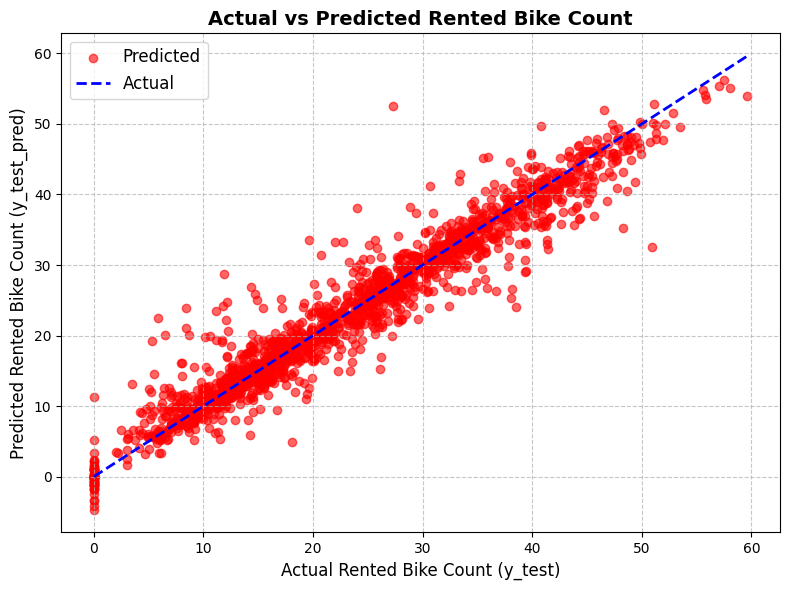

In [ ]:
# Plot y_test_pred against y_test
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, color='red', alpha=0.6, label='Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='blue', linestyle='--', linewidth=2, label='Actual')

# Adding labels and title
plt.xlabel('Actual Rented Bike Count (y_test)', fontsize=12)
plt.ylabel('Predicted Rented Bike Count (y_test_pred)', fontsize=12)
plt.title('Actual vs Predicted Rented Bike Count', fontsize=14, fontweight='bold')

# Adding grid and legend
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=12)
plt.tight_layout()

# Show plot
plt.show()

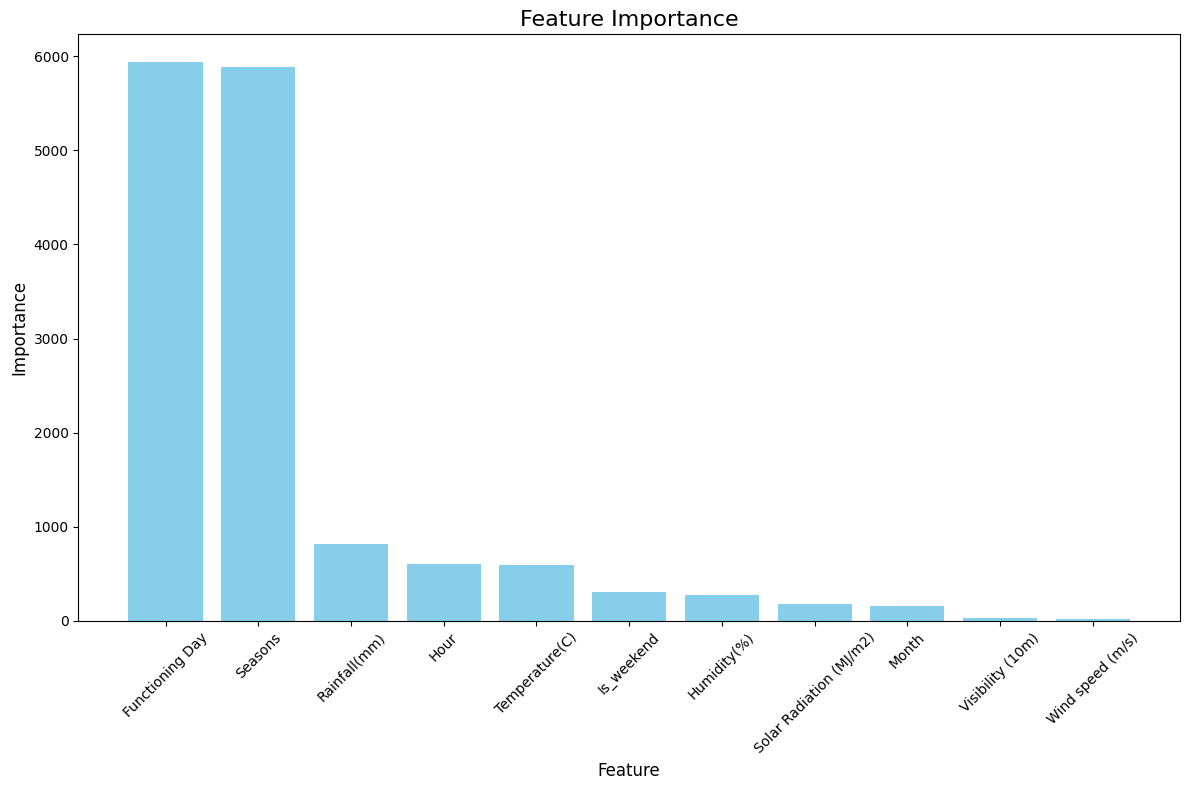

Top 5 Features:
1. Functioning Day: 5936.38
2. Seasons: 5883.10
3. Rainfall(mm): 816.49
4. Hour: 608.39
5. Temperature(C): 596.02


In [ ]:
# Create a list of the feature names and their importance using imporance_type as 'gain'

feature_importance = model.get_booster().get_score(importance_type='gain')
feature_importance = sorted(feature_importance.items(), key=lambda x: x[1], reverse=True)

# Merge the pairs with Seasons_Winter, Seasons_Spring, Seasons_Summer, Seasons_Autumn in feature_importance into Seasons by addition

overall_Seasons_importance = 0
for key, value in feature_importance:
    if 'Seasons' in key:
        overall_Seasons_importance += value
        # Pop the key-value pair
        feature_importance.remove((key, value))

# Add the overall importance of 'Seasons' to the list
feature_importance.append(('Seasons', overall_Seasons_importance))
# Sort the feature_importance list by importance in descending order
feature_importance = sorted(feature_importance, key=lambda x: x[1], reverse=True)

# Plot the feature importance as a bar chart with Feature as a label and Importance as the height

plt.figure(figsize=(12, 8))
plt.bar([x[0] for x in feature_importance], [x[1] for x in feature_importance], color='skyblue')
plt.xlabel('Feature', fontsize=12)
plt.ylabel('Importance', fontsize=12)
plt.title('Feature Importance', fontsize=16)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Print the top-5 features with their importance

print("Top 5 Features:")
for i, (feature, importance) in enumerate(feature_importance[:5], 1):
    print(f"{i}. {feature}: {importance:.2f}")

## 4

In [ ]:
!pip install Optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.0/233.0 kB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 4.2 MB/s eta 0:00:00


In [ ]:
import optuna

In [ ]:
def objective(trial):
    # Define the hyperparameter space
    param = {
        'verbosity': 0,
        'objective': 'reg:squarederror',
        'booster': 'gbtree',
        'tree_method': 'auto',
        'lambda': trial.suggest_float('lambda', 1e-3, 10.0, log=True),
        'alpha': trial.suggest_float('alpha', 1e-3, 10.0, log=True),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'learning_rate': trial.suggest_float('learning_rate', 1e-3, 0.1, log=True),
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'max_depth': trial.suggest_int('max_depth', 3, 9),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
    }

    # Train the model
    model = xgb.XGBRegressor(**param)
    model.fit(X_train, y_train)

    # Predict and calculate the RMSE
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    return rmse

# Create a study and optimize the objective function
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100)

# Best hyperparameters found by Optuna
best_params = study.best_params
print("Best Parameters:", best_params)

[I 2024-09-01 16:37:09,367] A new study created in memory with name: no-name-5a9fc98a-39aa-49bf-9d35-fdf088eae194
[I 2024-09-01 16:37:26,733] Trial 0 finished with value: 5.936545597244331 and parameters: {'lambda': 1.2955474501922681, 'alpha': 0.9532087406879415, 'subsample': 0.9221115647567002, 'colsample_bytree': 0.5767666043909196, 'learning_rate': 0.0014316626573794215, 'n_estimators': 952, 'max_depth': 9, 'min_child_weight': 8}. Best is trial 0 with value: 5.936545597244331.
[I 2024-09-01 16:37:39,375] Trial 1 finished with value: 2.9597707068647265 and parameters: {'lambda': 2.6358785670760545, 'alpha': 0.4024725410480571, 'subsample': 0.7656597217781929, 'colsample_bytree': 0.6986045036134644, 'learning_rate': 0.019212156498468785, 'n_estimators': 549, 'max_depth': 9, 'min_child_weight': 10}. Best is trial 1 with value: 2.9597707068647265.
[I 2024-09-01 16:37:51,389] Trial 2 finished with value: 5.931008460308296 and parameters: {'lambda': 0.02105346130617975, 'alpha': 0.131167

Best Parameters: {'lambda': 1.2063295587192868, 'alpha': 0.01303438003309553, 'subsample': 0.5519928675452799, 'colsample_bytree': 0.955647137193912, 'learning_rate': 0.022798553906864093, 'n_estimators': 840, 'max_depth': 9, 'min_child_weight': 2}


In [ ]:
# Train the model using the best hyperparameters
model_optimized = xgb.XGBRegressor(**best_params)
model_optimized.fit(X_train, y_train)

# Predictions for train and test datasets
y_train_pred_opt = model_optimized.predict(X_train)
y_test_pred_opt = model_optimized.predict(X_test)

# Evaluate the performance (R^2 and RMSE)
r2_train_opt = r2_score(y_train, y_train_pred_opt)
rmse_train_opt = np.sqrt(mean_squared_error(y_train, y_train_pred_opt))

r2_test_opt = r2_score(y_test, y_test_pred_opt)
rmse_test_opt = np.sqrt(mean_squared_error(y_test, y_test_pred_opt))

print(f"Optimized Train R^2: {r2_train_opt:.4f}")
print(f"Optimized Train RMSE: {rmse_train_opt:.4f}")
print(f"Optimized Test R^2: {r2_test_opt:.4f}")
print(f"Optimized Test RMSE: {rmse_test_opt:.4f}")

Optimized Train R^2: 0.9969
Optimized Train RMSE: 0.6927
Optimized Test R^2: 0.9497
Optimized Test RMSE: 2.7820


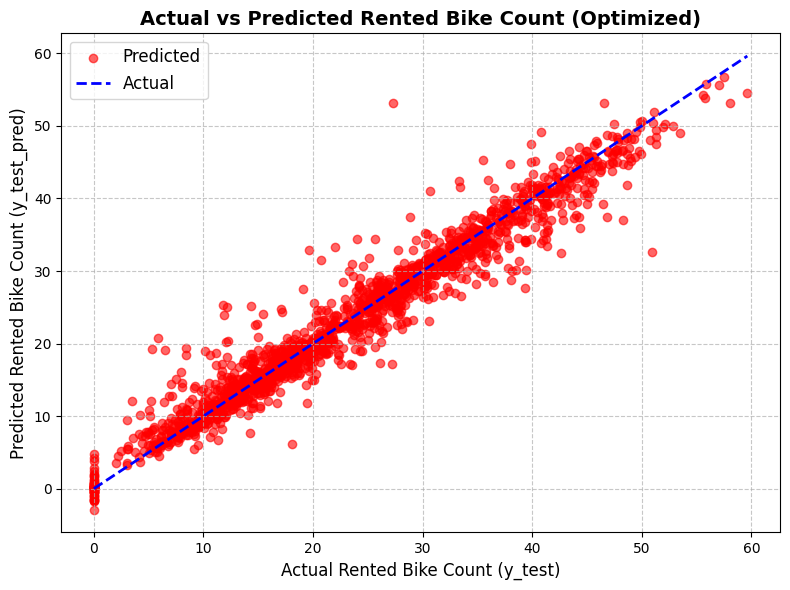

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred_opt, color='red', alpha=0.6, label='Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='blue', linestyle='--', linewidth=2, label='Actual')

plt.xlabel('Actual Rented Bike Count (y_test)', fontsize=12)
plt.ylabel('Predicted Rented Bike Count (y_test_pred)', fontsize=12)
plt.title('Actual vs Predicted Rented Bike Count (Optimized)', fontsize=14, fontweight='bold')

plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

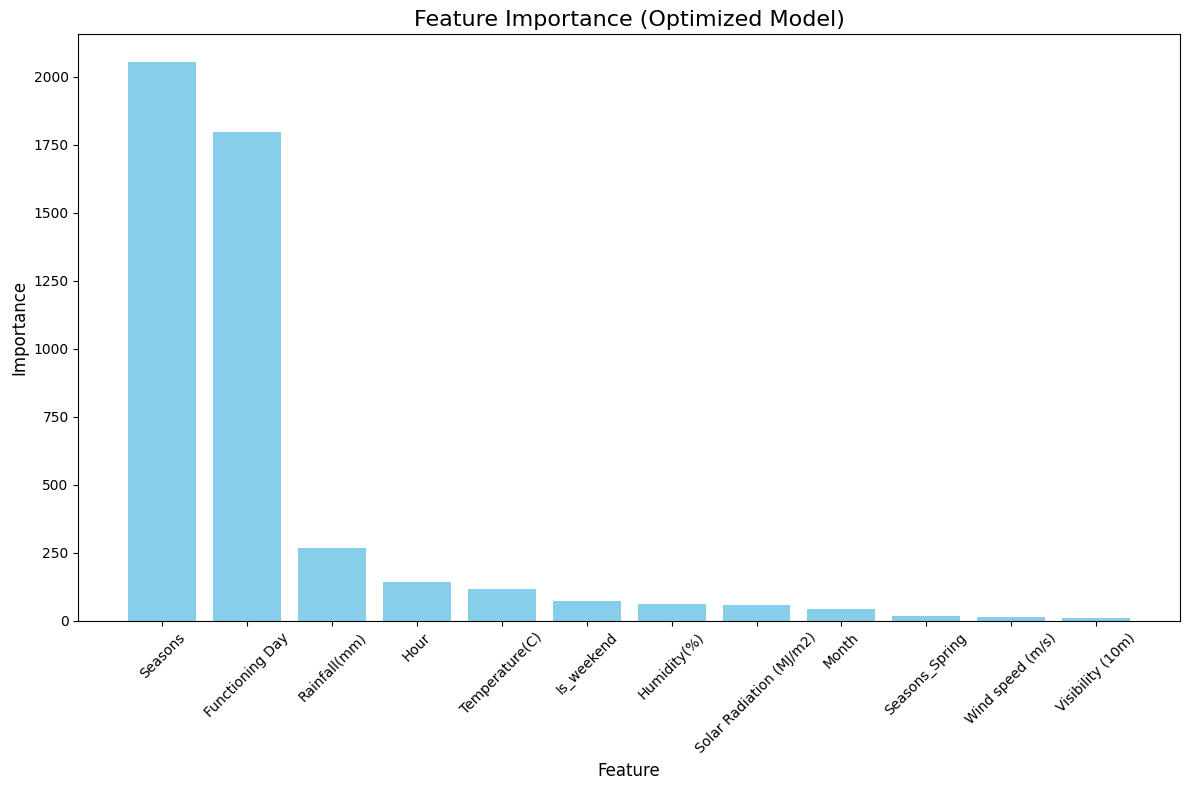

Top 5 Features (Optimized Model):
1. Seasons: 2053.42
2. Functioning Day: 1796.81
3. Rainfall(mm): 268.08
4. Hour: 142.73
5. Temperature(C): 117.23


In [ ]:
# Get feature importance
feature_importance_opt = model_optimized.get_booster().get_score(importance_type='gain')
feature_importance_opt = sorted(feature_importance_opt.items(), key=lambda x: x[1], reverse=True)

# Merge Seasons features
overall_Seasons_importance_opt = 0
for key, value in feature_importance_opt:
    if 'Seasons' in key:
        overall_Seasons_importance_opt += value
        feature_importance_opt.remove((key, value))

feature_importance_opt.append(('Seasons', overall_Seasons_importance_opt))
feature_importance_opt = sorted(feature_importance_opt, key=lambda x: x[1], reverse=True)

# Plot feature importance
plt.figure(figsize=(12, 8))
plt.bar([x[0] for x in feature_importance_opt], [x[1] for x in feature_importance_opt], color='skyblue')
plt.xlabel('Feature', fontsize=12)
plt.ylabel('Importance', fontsize=12)
plt.title('Feature Importance (Optimized Model)', fontsize=16)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Print the top-5 features with their importance
print("Top 5 Features (Optimized Model):")
for i, (feature, importance) in enumerate(feature_importance_opt[:5], 1):
    print(f"{i}. {feature}: {importance:.2f}")

In [ ]:
print(f"Default Train R^2: {r2_train:.4f}")
print(f"Default Train RMSE: {rmse_train:.4f}")
print(f"Default Test R^2: {r2_test:.4f}")
print(f"Default Test RMSE: {rmse_test:.4f}")

print(f"Optimized Train R^2: {r2_train_opt:.4f}")
print(f"Optimized Train RMSE: {rmse_train_opt:.4f}")
print(f"Optimized Test R^2: {r2_test_opt:.4f}")
print(f"Optimized Test RMSE: {rmse_test_opt:.4f}")

Default Train R^2: 0.9841
Default Train RMSE: 1.5725
Default Test R^2: 0.9356
Default Test RMSE: 3.1474
Optimized Train R^2: 0.9969
Optimized Train RMSE: 0.6927
Optimized Test R^2: 0.9497
Optimized Test RMSE: 2.7820
